# Author Age Prediction from Social Media Text
## Using Machine Learning Models to Predict which Age Group the Author Belongs to
### Anna Lin

In [1]:
knitr::opts_chunk$set(echo = TRUE, message = FALSE,
                      warning = FALSE)

# Introduction

The purpose of this project is to explore the capabilities of social media text-based age prediction by developing a machine learning model to predict which age group a user belongs to by studying blog posts written by them. I will be framing this task as a binary classification problem, splitting users into 2 age groups: `Age < 18` and `Age = 18+`. I will be applying various methods to the [Blog Authorship Corpus dataset](https://www.kaggle.com/datasets/rtatman/blog-authorship-corpus) on Kaggle to achieve the most accurate model.

## Inspiration and Motive

In the past few years, especially due the pandemic, social media usage has skyrocketed into one of the most popular ways of communication in daily life for people across many age groups. We are able to connect with people from all walks of life and generations. This had me wondering: with this enormous quantity of textual information from such a diverse group of people, would it be possible to aggregate a segment of this social media data and examine if there are differences in linguistic structures/speech patterns, stylistic features, and content interests among different age groups?

## Relevance and Why?
Obtaining an accurate model for social media authorship attribution can be applied to many areas of the digital world. With the exceptional growth of social media, we also see a significant increase in the demand for automatically analyzing online messages from the tremendous amounts of social media users for safety. Another application of this model is the process of suggesting/recommending age-appropriate services and content to users. Another problem that can be solved by accurate age prediction is the ability to detect harmful online conduct, specifically this model is geared towards combating online grooming. [Studies](https://www.nytimes.com/2022/03/24/well/family/child-social-media-use.html) have shown that children are engaging with social media more than ever, so it is imperative to improve internet safety.

## Project Outline

Now that we have examined the significance of this model, let's lay out our plan of action for building and training our model throughout this project. First, we begin by loading and cleaning our data by rectifying potential problems caused by missing data or text formatting. I will also remove any predictor variables that are irrelevant to the goal of this project. I will then add additional variables that processes the text for each post and enumerates phrases/keywords that may help indicate age and stage of life (i.e. profanity, career-related terms, school affiliated phrases, etc.). I will also be using sentiment analysis to explore whether people of one age group tend to text with more negative/positive sentiment score than the other. I will also be adding variables to consider linguistic features such as punctuation to word ratio, slang and abbreviation usage, and average blog length. We will use all of these variables as predictors and the age group as our response. We are trying to predict whether the author of a blog post is under 18 years old or 18 years and older, so I will be adding a variable to categorize bloggers into a factor with 2 levels. After completing all initial data manipulation and information extraction, we can proceed to perform a training/test split on our data, stratifying on the `age group` variable. Next, I will explore if there are any highly correlated variables and then create a recipe. Now, I can proceed to setting folds for a 10-fold cross validation and setting up a grid of possible values to consider for tuning model. We will then fit the following models: Logistic Regression, Lasso, Ridge, Elastic Net, Linear Discriminant Analysis, Quadratic Discriminant Analysis, Gradient-Boosted Trees, Random Forest, and K-Nearest Neighbor. The best performing model will be fit to our testing data set. With that, we will conclude by analyzing the efficacy and accuracy of the results of our final model.

# Loading Packages and Data

We begin by loading all the packages we will be using throughout this project.

In [2]:
# loading required packages
library(ISLR)
library(ISLR2)
library(tidyverse)
library(dplyr)
library(tidymodels)
library(readr)
library(kknn)
library(ggplot2)
library(corrplot)
library(corrr)
library(ggthemes)
library(kableExtra)
library(discrim)
library(tidytext)
library(stringr)
library(tidyr)
library(scales)
library(SentimentAnalysis)
library(naniar)
tidymodels_prefer()

set.seed(1213)


Attaching package: ‘ISLR2’


The following objects are masked from ‘package:ISLR’:

    Auto, Credit


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.5     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ────────────────────

Now, loading the main data set we are using, the Blog Authorship Corpus from Kaggle.

In [3]:
# assigning the data to a variable
blog_data <- read.csv("/kaggle/input/blog-authorship-corpus/blogtext.csv", skipNul = TRUE)

In [4]:
# see preview of the data set
#blog_data[70:100, 1:7]%>% 
#  kable() %>% 
#  kable_styling(full_width = F) %>% 
#  scroll_box(width = "100%", height = "200px")

head(blog_data)

id      gender age topic             sign     date        
1 2059027 male   15  Student           Leo      14,May,2004 
2 2059027 male   15  Student           Leo      13,May,2004 
3 2059027 male   15  Student           Leo      12,May,2004 
4 2059027 male   15  Student           Leo      12,May,2004 
5 3581210 male   33  InvestmentBanking Aquarius 11,June,2004
6 3581210 male   33  InvestmentBanking Aquarius 10,June,2004
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Data Description
The [Blog Authorship Corpus dataset](https://www.kaggle.com/datasets/rtatman/blog-authorship-corpus) consists of over 600,000 posts from 19,000+ bloggers scrapped from www.blogger.com by user Rachael Tatman. Approximately 35 posts (7,250 words) were collected per blogger.com user, with their self-provided gender, age, and astrological sign (we will not be using this variable). As we can see in this preview, blog posts are often informal and diary-style entries, much like what we see in other popular social media apps.  There is generally an equal amount of male and female bloggers per age group. All formatting has been stripped already and links within a blog post are denoted as `urllink`. 

# Exploratory Data Analysis

## Variable Selection

Let's further explore what information our data set provides!

In [5]:
# Checking our total number of obs and variables
dim(blog_data)

[1] 681284      7

Here, we can see that the data set contains exactly 681,284 rows and 7 columns. So, that means the data set includes 681,284 blog entries and 7 variables for us to work with. Since many of those variables (`id`, `sign`, `date`) are insignificant and `age` is the response variable, we will only have a remaining of 3 predictor variables. Therefore, we will definitely have to add predictor variables to our data set. To do this, we can use natural language processing on our `text` variable.


Also, we can see that there is an insurmountable amount of blog entries for us to work with, so we can reduce the total amount of data we are working with to allow the code to run with less difficulty.

Perhaps we can do this by only examining one blog entry per user. Let's check how many unique IDs there are in this data set.

In [6]:
# Counting unique user IDs

blog_data %>%
  distinct(id) %>%
  count()

n
<int>
19320


We can see that there are 19,320 bloggers with around 35 posts each, so let's reduce our data set to have 1 post from 10,000 of the bloggers. This will still leave us with a substantial amount of data to train our model with. 

In [7]:
# Creating a new data set with only one entry per blogger

blog <- blog_data %>%
  distinct(id, .keep_all=TRUE)

# Reduce data set to just 10000 of the bloggers

blog <- blog[1:10000,]

# Preview reduced data set

# head(blog) %>% 
#  kable() %>% 
#  kable_styling(full_width = F) %>% 
#  scroll_box(width = "100%", height = "200px")

head(blog)

,id,gender,age,topic,sign,date,text
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html."
2,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004","Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'. So, without further ado here is the link to 24-hour K-Pop urlLink audio and the urlLink video streaming. Enjoy."
3,3539003,female,14,indUnk,Aries,"07,June,2004","O= optimist P= pessimist My argument with myself: P: Nooooo! Stop thinking about him! O: Why? He's my boyfriend. I'm allowed to. P: You're obsessing! O: What?! No I'm not. I just like him a lot. P: You're crazy if you think it's going to work! O: Ok... Then I'm crazy! P: So you think it will work out between you two? Do you think he's 'the one'? O: Yes and possibly. P: Insane! I can't believe you! You know what is going to happen! The same thing that always happens. You will get your hopes up and then He will drop you flat on your face! O: He would never do that! Not in a million years! P: What makes you think that? O: He's different. P: How so? Every guy you've ever met has hurt you in some way, and he is a guy... Right? O: Of course he is a guy! P: So how do you know HE won't break your heart too. O: I just know. P: Oh my gosh! I don't know why you are doing this to yourself again!"
4,4172416,female,25,indUnk,Capricorn,"08,August,2004","urlLink im new to this, CAN you tell!- god how do i create a links column"
5,3668238,female,17,Student,Gemini,"30,June,2004","http://www.uploadimages.net/images/648898PICT0074.JPG http://www.uploadimages.net/images/789165PICT0037.JPG http://www.uploadimages.net/images/456053PICT0066.JPG my shoes travel far and wide http://www.uploadimages.net/images/322394PICT0096.JPG one day i will look nice in a pic http://www.uploadimages.net/images/149883PICT0026.JPG banana phone!!! i hav loads more but will put em on a site or somit later, ~Disturbed Angel - Beautifully Decayed~"
6,4030905,female,17,Student,Aries,"31,July,2004","Met Lim this morning, then we went to SPC to get help from Raymond.MATHS..no choice la..cos there's a maths quiz coming up and our lecturer is damn boring. Seriously, yesterday was the very first time I really can listen and pay attention during maths with minimal distraction. Went to TP in the afternoon with Janice and Mandy..studed in the library till it close..Badminton at 5pm, TP sports hall..I only managed to do little stuff at TP cos I can't study outside..many pple plus distractions..so irritating. Headed for TM after that..Went NTUC to buy fruits and bars. Then Janice didn't allow me to go home. So accompanied her to YAMAHA..she wanna buy a new guitar. Rich girl."


Next, let's add a variable to categorize bloggers into our binary classification groups. Also, we can remove dollar signs from our text as that may cause an issue in the future.

In [8]:
# Adding factor variable age_group with 2 levels
blog <- blog %>%
  mutate(age_group = case_when(age <  18 ~ "under",       # Ages under 18
                               age >= 18 ~ "over")) %>%   # Ages over 18
  mutate(age_group = as.factor(age_group)) %>%  
  mutate(text = gsub("\\$","",text))             # Remove dollar signs from text

## Natural Language Processing

To break down `text` into statistical data we can work with, we will be using natural language processing methods such as word segmentation (tokenization), sentiment analysis, terminology extraction, and sentence breaking. 

First, lets compare the word frequencies from both groups.

In [9]:
# Splitting groups into two individual data sets for comparison

under_group <- blog[which(blog$age< 18),]%>%
  mutate(wordcount = sapply(strsplit(text, "[A-z]\\W+"), length))
over_group <- blog[which(blog$age >= 18),]%>%
  mutate(wordcount = sapply(strsplit(text, "[A-z]\\W+"), length))

# Separating chunks of texts into individual words

# Ages Under 18
text_under <- tibble(id = under_group$id, 
               text= under_group$text)
tokens_under <- text_under %>% unnest_tokens(word, text)

# Ages 18 and Over
text_over <- tibble(id = over_group$id, 
               text= over_group$text)
tokens_over <- text_over %>% unnest_tokens(word, text)

Warning message:
“Removed 50517 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 50518 rows containing missing values (`geom_text()`).”


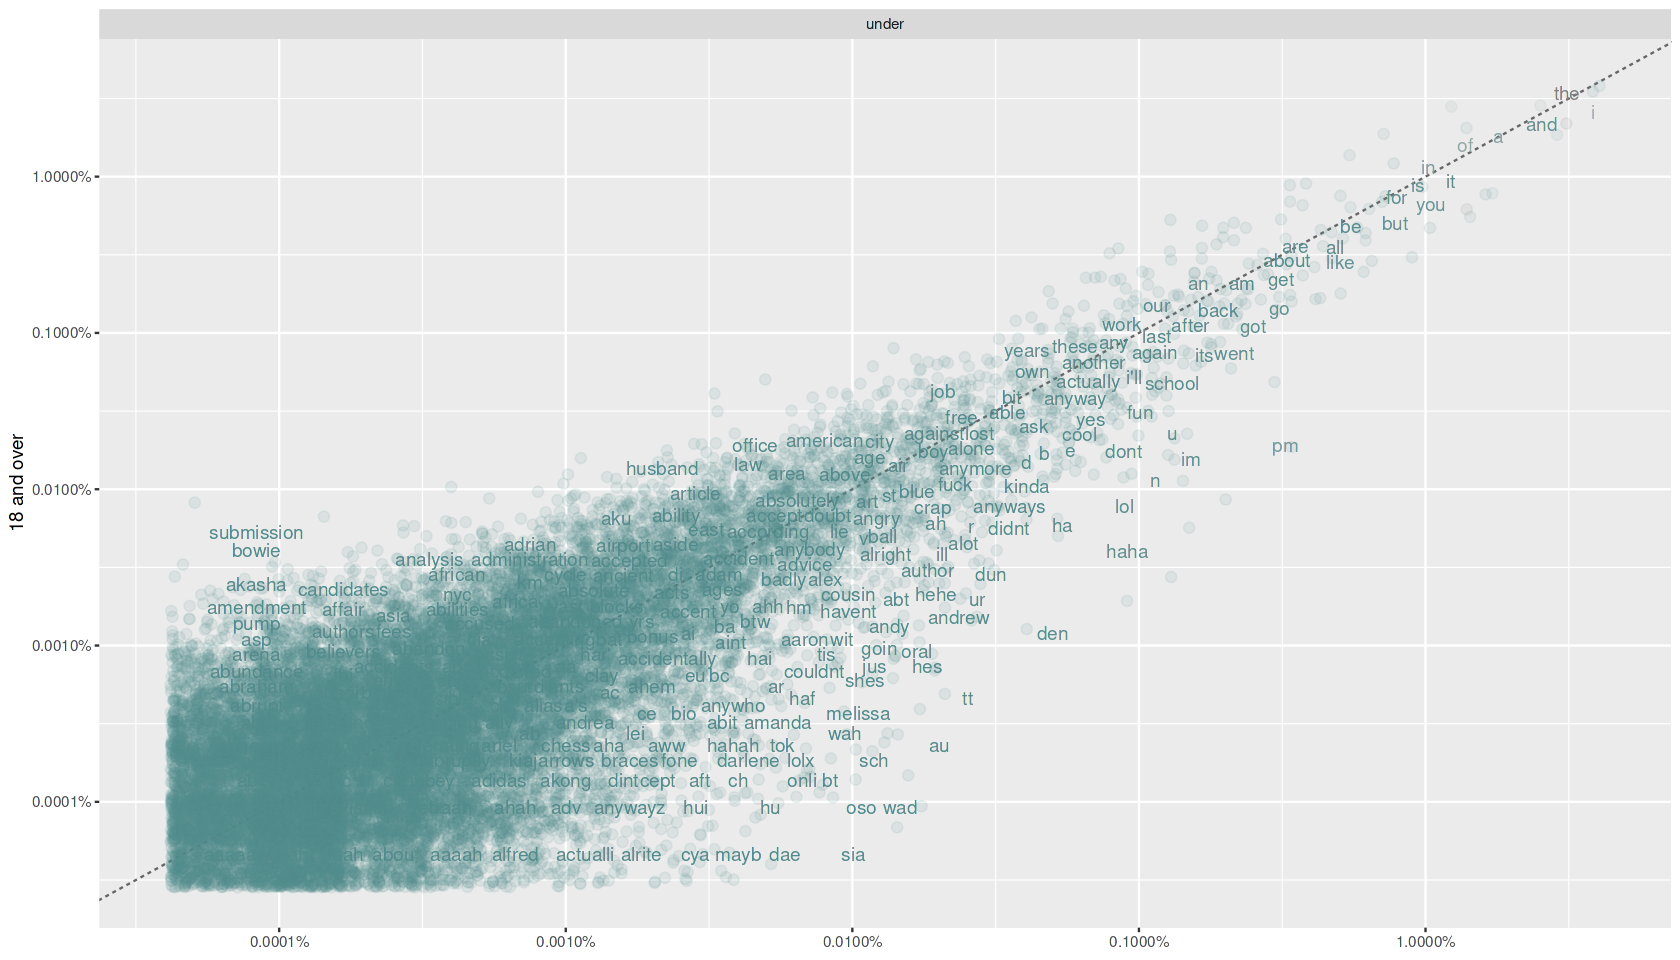

In [10]:
# Comparing the word frequencies of both groups

# Counting word frequencies for both groups 
frequency <- bind_rows(mutate(tokens_under, age = "under"),      # binding the 2 data frames together
                       mutate(tokens_over, age = "over")) %>% 
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(age, word) %>%
  group_by(age) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  pivot_wider(names_from = age, values_from = proportion) %>%    # reshaping data frame
  pivot_longer(`under`,
               names_to = "age", values_to = "proportion")


# Plotting the frequency comparison
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(frequency, aes(x = proportion, y = `over`, 
                      color = abs(`over` - proportion))) +
  geom_abline(color = "gray40", lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.01), 
                       low = "darkslategray4", high = "gray75") +
  facet_wrap(~age, ncol = 2) +
  theme(legend.position="none") +
  labs(y = "18 and over", x = NULL)

Words that are close to the line in these plots have similar frequencies in both sets of texts. For example, both groups have high frequencies of words such as "about", "actually", and "for".


Words that are far from the line are words that are found more in one set of texts than another. For example, in the Age Group 18+ uses words such as "husband", "bowie", and "analysis" more frequently compared to Ages under 18. We also see that Ages under 18 more frequently uses words such as "lol", "cya", and "den" (short form of the word "then").


We can also create word clouds from the package `wordcoud` to visually see the 100 most frequent words with each group. We will remove stop words from showing up in the word cloud (i.e. insignificant words such as "the", "and", "for").

Loading required package: RColorBrewer

Joining with `by = join_by(word)`
Joining with `by = join_by(word)`


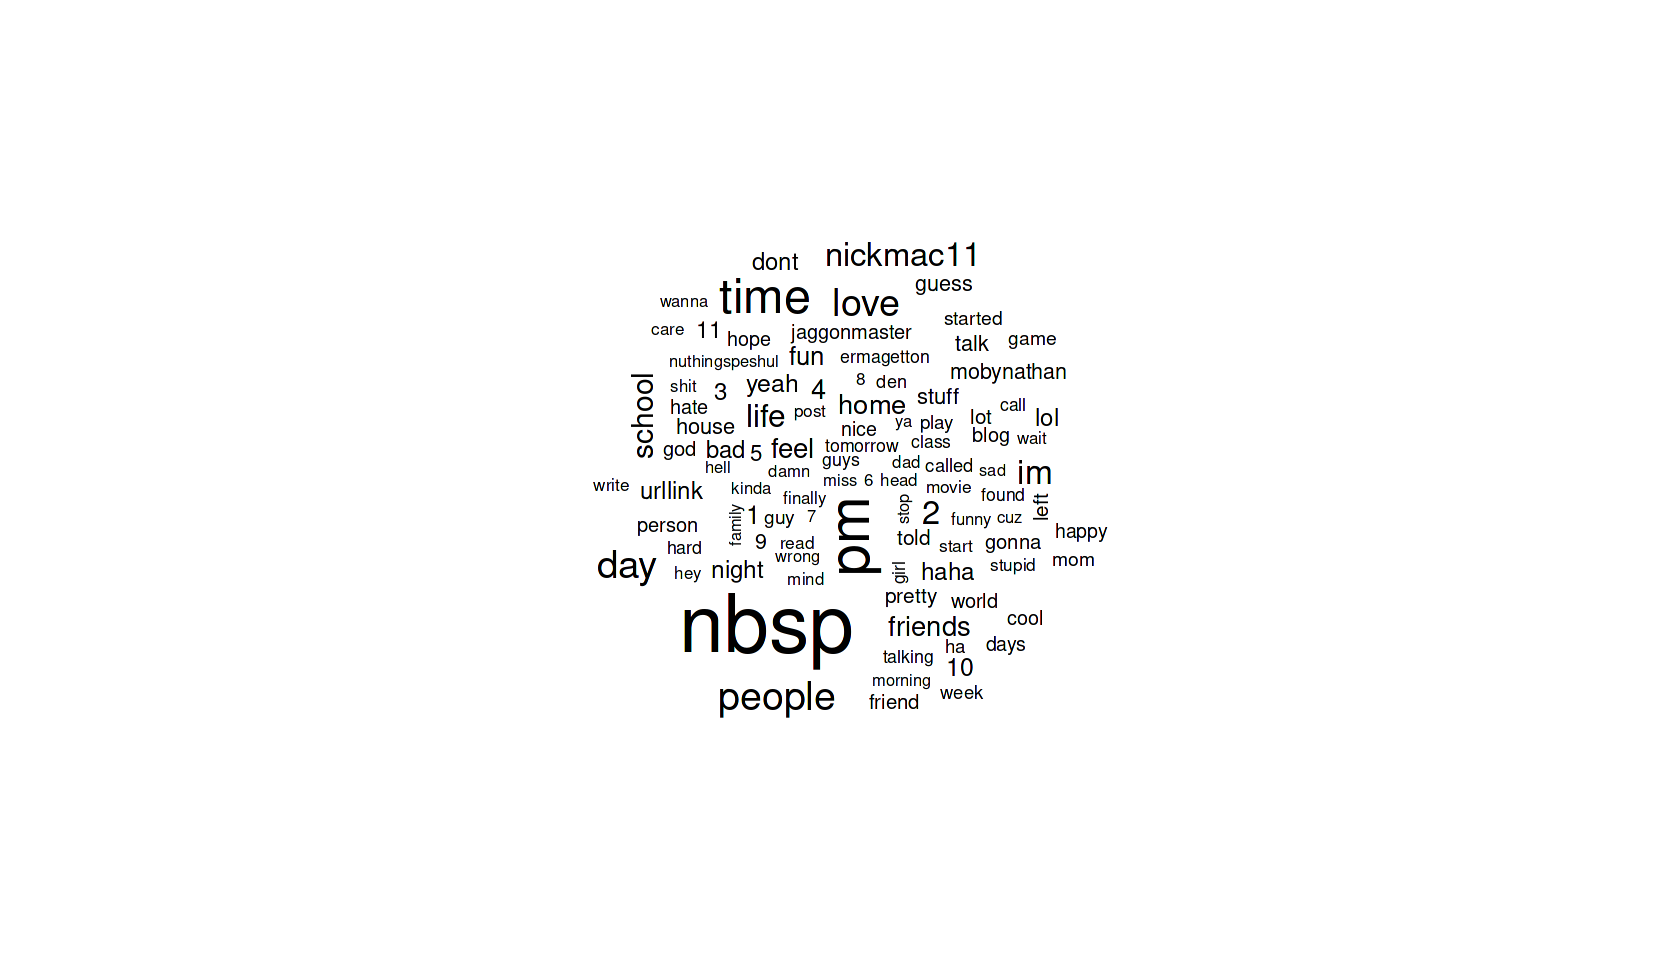

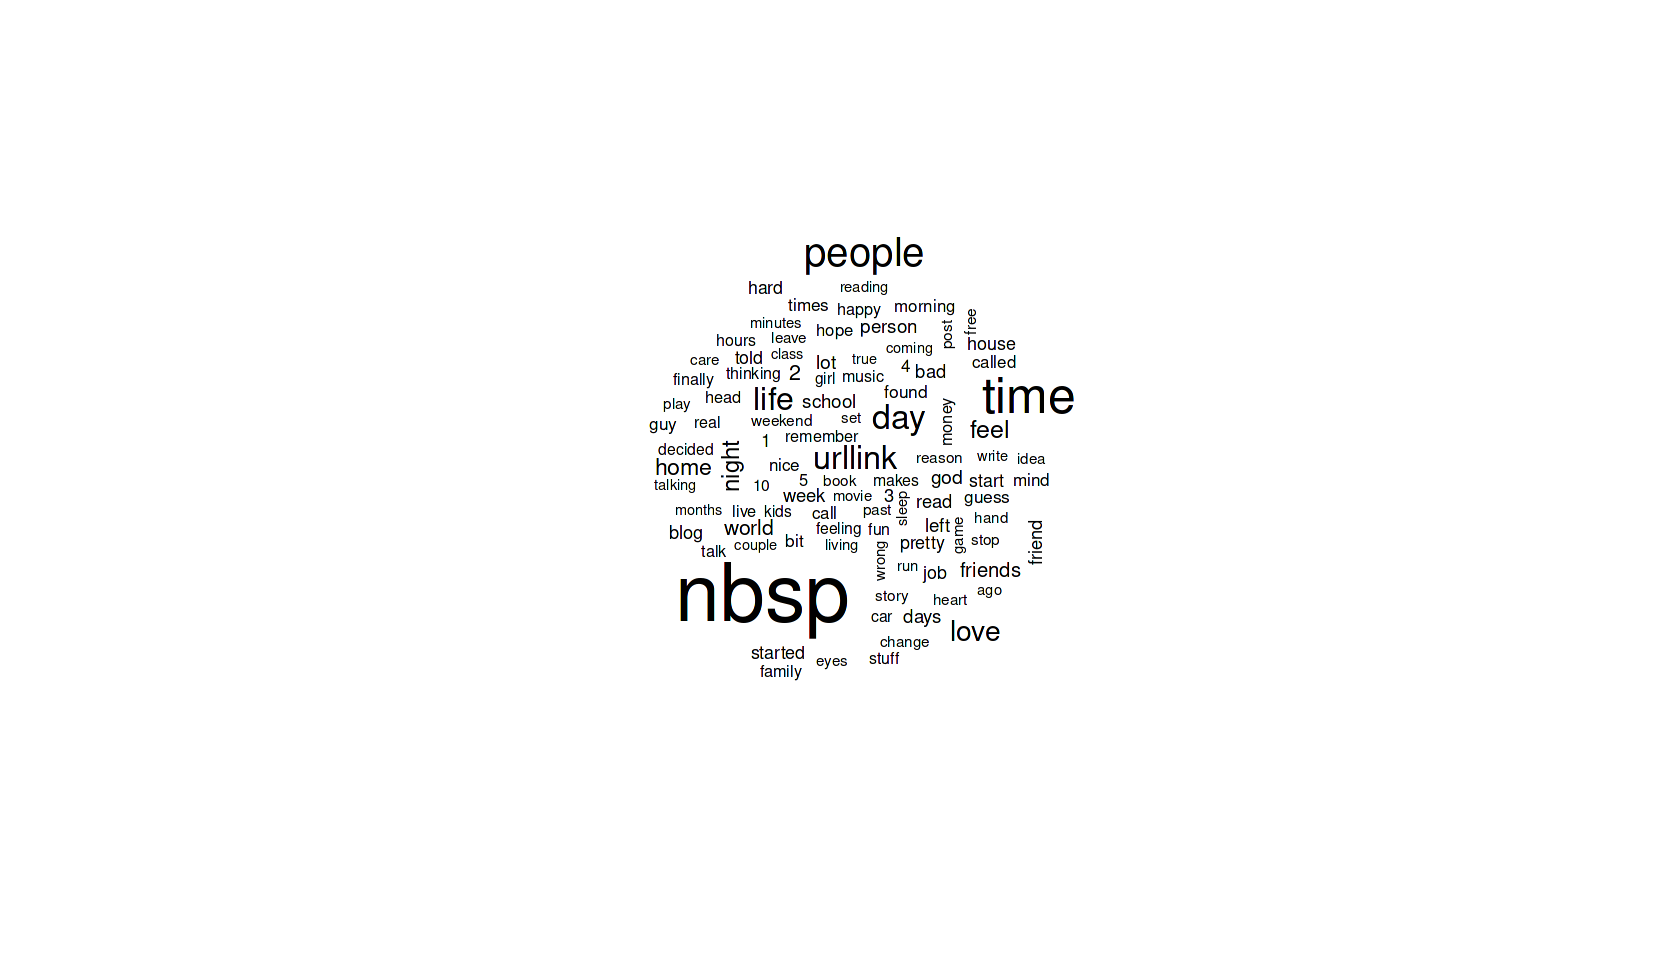

In [11]:
# Loading wordcloud package

library(wordcloud)

# Visualizing most frequent words for Ages under 18
tokens_under %>%
  anti_join(stop_words) %>% # remove stop words 
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

# Visualizing most frequent words for Ages 18 and over
tokens_over %>%
  anti_join(stop_words) %>% # remove stop words
  count(word) %>%
  with(wordcloud(word, n, max.words = 100)) 

With these results, we can conclude that abbreviations/slang may  be an indicator of a user that is under 18. We can even see in the word cloud that a lot of words that are not in the english dictionary appear in the most frequent words for ages 18 and under. Thus, let's add a predictor variable counting the slang and abbreviations in a text from a collection of words I self accumulated.

In [12]:
# Adding variable `slang` 

blog <- blog %>%
  mutate(slang = str_count(text, "omg")+str_count(text, "cuz")+str_count(text, "coz")+str_count(text, "wtf")+str_count(text, "lol")+str_count(text, "rofl")+str_count(text, "lmao")+str_count(text, "hmu")+str_count(text, "lmfao")+str_count(text, "yolo")+str_count(text, "tmi")+str_count(text, "nvm")+str_count(text, "jk")+str_count(text, "imo")+str_count(text, "tbh")+str_count(text, "GOAT")+str_count(text, "bruh")+str_count(text, "bae")+str_count(text, "slay")+str_count(text, "fleek")+str_count(text, "BFF")+str_count(text, "havnt")+str_count(text, "tsk")+str_count(text, "hehe"))


The results of the frequency graph shows that life - stage terms such as "husband" may be indicative of age. Perhaps, we could add a a few variables for different stages of life such as school, career, and family.

In [13]:
# Counting school-related terms

blog <- blog %>%
  mutate(school = str_count(text, "school")+str_count(text, "class")+str_count(text, "teacher")+str_count(text, "tutor")+str_count(text, "campus")+str_count(text, "university")+str_count(text, "college")+str_count(text, "freshman")+str_count(text, "study")+str_count(text, "semester"))

In [14]:
# Counting career-related terms

blog <- blog %>%
  mutate(career = str_count(text, "career")+str_count(text, "job")+str_count(text, "manager")+str_count(text, "boss")+str_count(text, "employ")+str_count(text, "occupation")+str_count(text, "profession")+str_count(text, "internship")+str_count(text, "coworker")+str_count(text, "work")+str_count(text, "wage")+str_count(text, "overtime")+str_count(text, "recruit")+str_count(text, "resume")+str_count(text, "startup")+str_count(text, "WFH")+str_count(text, "meeting")+str_count(text, "portfolio")+str_count(text, "tax"))

In [15]:
# Counting family-related terms

blog <- blog %>%
  mutate(family = str_count(text, "husband")+str_count(text, "wife")+str_count(text, "child")+str_count(text, "daughter")+str_count(text, "son")+str_count(text, "marriage")+str_count(text, "kid")+str_count(text, "fiance"))

People who are interested in certain topics, such as politics, may be of a higher age group so let's also count politics related terms.

In [16]:
# Counting Political Words

blog <- blog %>%
  mutate(political = str_count(text, "president")+str_count(text, "country")+str_count(text, "congress")+str_count(text, "alliance")+str_count(text, "vote")+str_count(text, "election")+str_count(text, "corrupt")+str_count(text, "regime")+str_count(text, "candidate")+str_count(text, "democracy")+str_count(text, "nominee")+str_count(text, "partisan")+str_count(text, "politic")+str_count(text, "democrat")+str_count(text, "republican"))

People who are over 18 may also be more likely to incorporate profanity into their posts so we should also add this as a variable.

In [17]:
# Counting curse words in each text

blog <- blog %>%
  mutate(profanity = str_count(text, "fuck")+str_count(text, "crap")+str_count(text, "bitch")+str_count(text, "damn"))


Next, we will use the `SentimentAnalysis` package to analyze the sentiment score for each text. This package allows us to perform sentiment analysis by converting the text into a machine-readable format. It starts by executing a series of preprocessing operations: text tokenization, stopword removal, stemming, removal of punctuation and conversion to lower-case. It uses a dictionary-based approach to generate lists of positive and negative words. The respective incidences of these words are then combined into a single sentiment score.

We will do this since it may be possible that different age groups tend to share posts with more negative or positive attitudes. So let's take this into account as well into our prediction.

In [18]:
# Extract dictionary-based sentiment according to the QDAP dictionary

blog <- blog %>%
  mutate(sentiment = analyzeSentiment(text)$SentimentQDAP)

## Other Characteristics


It is also possible that other characteristics such as punctuation usage, blog length, and link usage frequency may differ with age. 

So first let's add variable `wordcount` to count up the number of words per blog post. We will do this by using function `strsplit()` to split a string up by spaces and then using function `sapply(str, length)` to retrieve the length of the split vector.

In [19]:
# Counting number of words

blog <- blog %>%
  mutate(wordcount = sapply(strsplit(text, "[A-z]\\W+"), length))

Next, we can use this new `wordcount` variable to calculate the ratio of punctuation to words.

In [20]:
# Calculating punctuation to word ratio

blog <- blog %>%
  mutate(punc_ratio = str_count(text, "[:punct:]")/wordcount)

Lastly, we will count how often bloggers included a link into their blog post. Recall that links within a blog post have been stripped of their original formatting and are denoted as `urllink`. From the wordcloud, it seems that people ages 18 and over tend to add more links to their posts than ages 18 and under so we can add a predictor variable for this.

In [21]:
# Adding variable to count links in each post

blog <- blog %>%
  mutate(linkcount = str_count(text, "urlLink"))

## Missing Data

We should first see if we have any missing data since this may cause potential issues in later parts of our data analysis and model building. To do this, we can use the `vis_miss()` function.

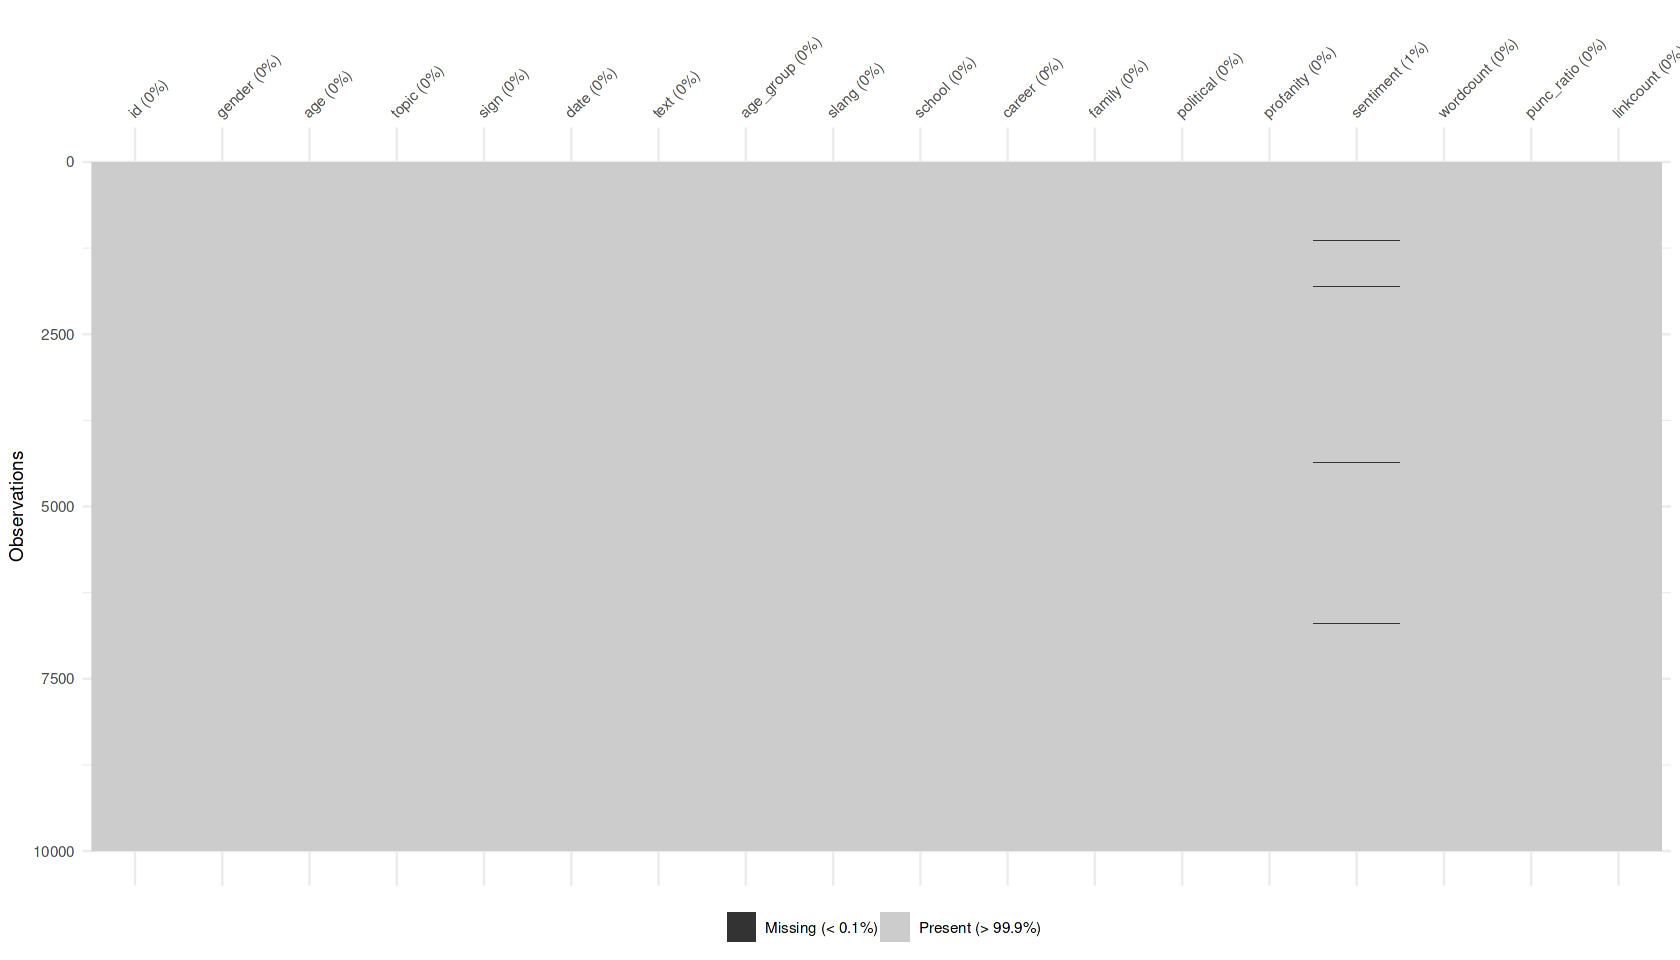

In [22]:
# Create a graph calculating percentage of missing data
vis_miss(blog)

So we can see that for the most part, there is no missing data. We see some missing values for sentiment, this may be due to the fact that no words in the sentiment QDA dictionary were detected in those blog texts so no sentiment score could be assigned to them. Since it is such a low proportion of the observations, it shouldn't cause much of a problem. We can solve this issue by imputing missing values using linear regression from another variable when we create our recipe.

## Visual EDA

### Slang and Abbreviation Usage
Now that we have all our other predictor variables added and analyzed missing data, we can proceed to analyzing the relationships between some variables with our outcome variable through data visualizations.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 4313 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 27 rows containing missing values (`geom_smooth()`).”


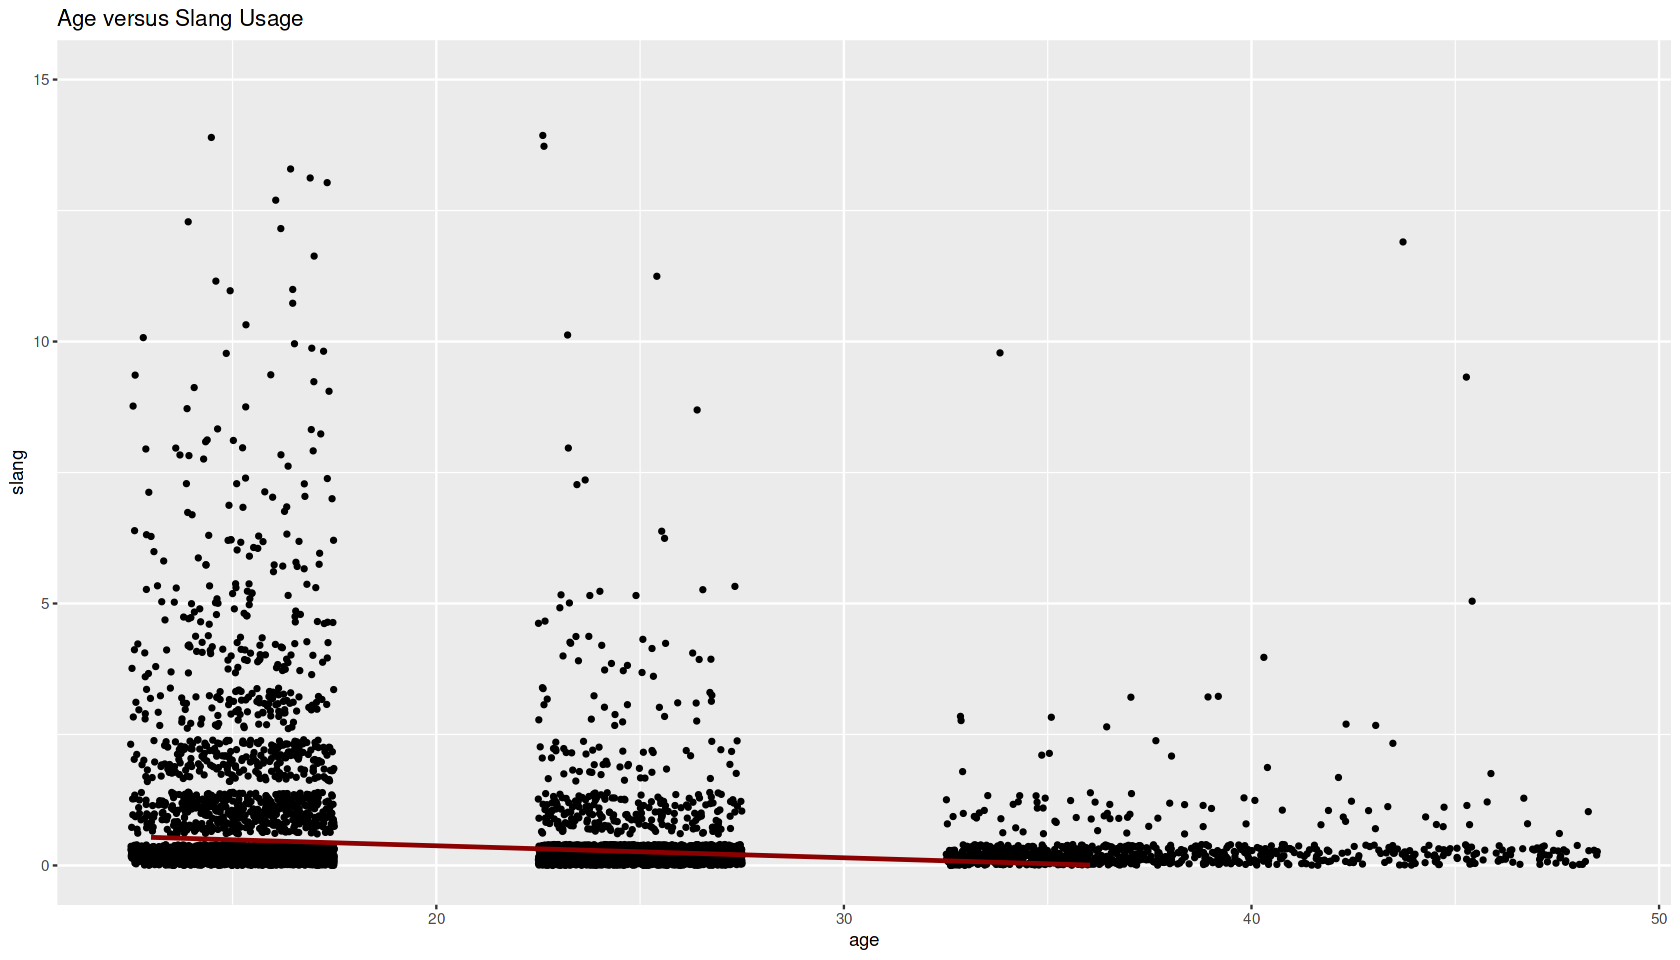

In [23]:
# Plotting slang and abbreviation counts to age
blog %>% 
  ggplot(aes(x=age, y=slang)) + 
  ylim(0, 15)+ # setting a smaller y limit to see points better
  geom_jitter(width = 0.5, size = 1) +
  geom_smooth(method = "lm", se =F, col="darkred")+
  labs(title = "Age versus Slang Usage")

We can see that there is definitely a higher rate of slang usage with those that are younger in age. That is, there is a negative correlation between `age` and `slang`. This is what we had expected from our previous frequency plots and wordcloud plots. So using this as a predictor variable will be beneficial for accuracy.

### Word Count

Let's calculate our average blog length for both age groups by adding up all word counts and dividing by number of users. Then, we can plot this side by side to see if there is a significant difference.

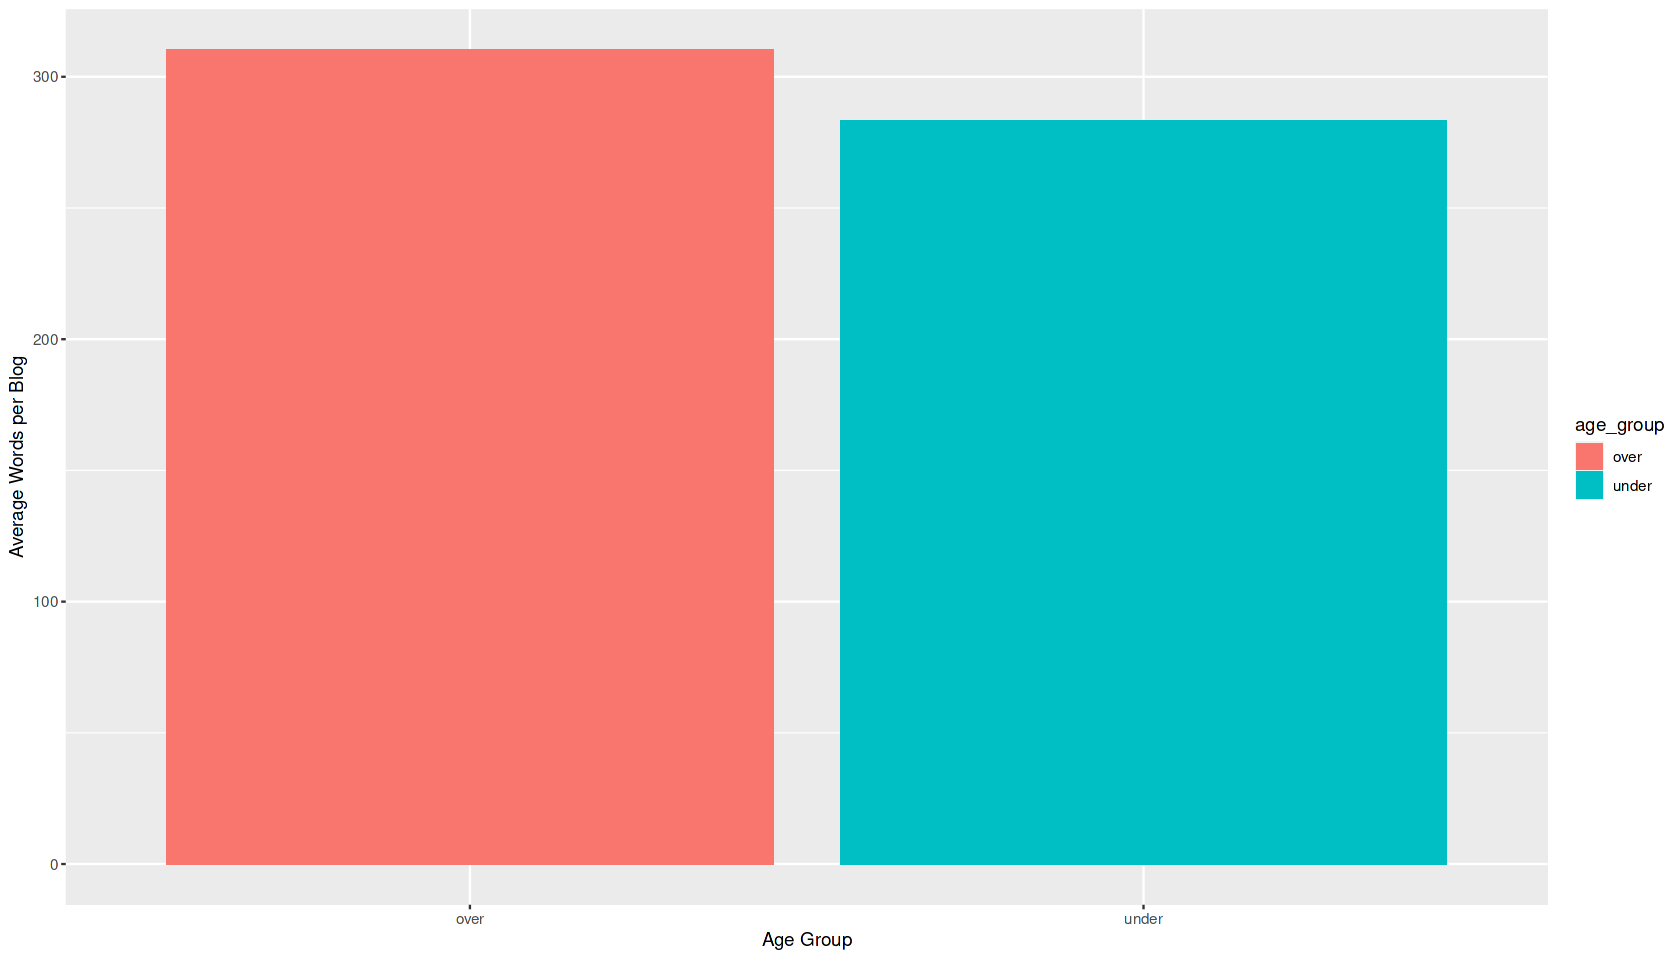

In [24]:
# Average blog length for Ages under 18
avg_under <- sum(under_group$wordcount) / length(under_group$id)

# Average blog length for Ages 18 and over
avg_over <- sum(over_group$wordcount) / length(over_group$id)

average_length <- tibble(age_group = c("under", "over"), average = c(avg_under, avg_over))

# Plotting average words per Blog
ggplot(average_length, aes(x=age_group, y=average, fill=age_group))+
  geom_bar(stat="identity") + 
  labs(x = "Age Group", y = "Average Words per Blog")

So we can see that age group 18 and over tend to have a higher word count on average versus those who are under 18. Although it is not a significant difference, we could use this along with other predictor variables to predict that posts with over 300 words have a high chance of being written by someone 18 and over. This may be due to the reason that those under 18 tend to use more abbreviations, thereby decreasing their overall word count. 

### Sentiment Score

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 69 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 69 rows containing missing values (`geom_point()`).”


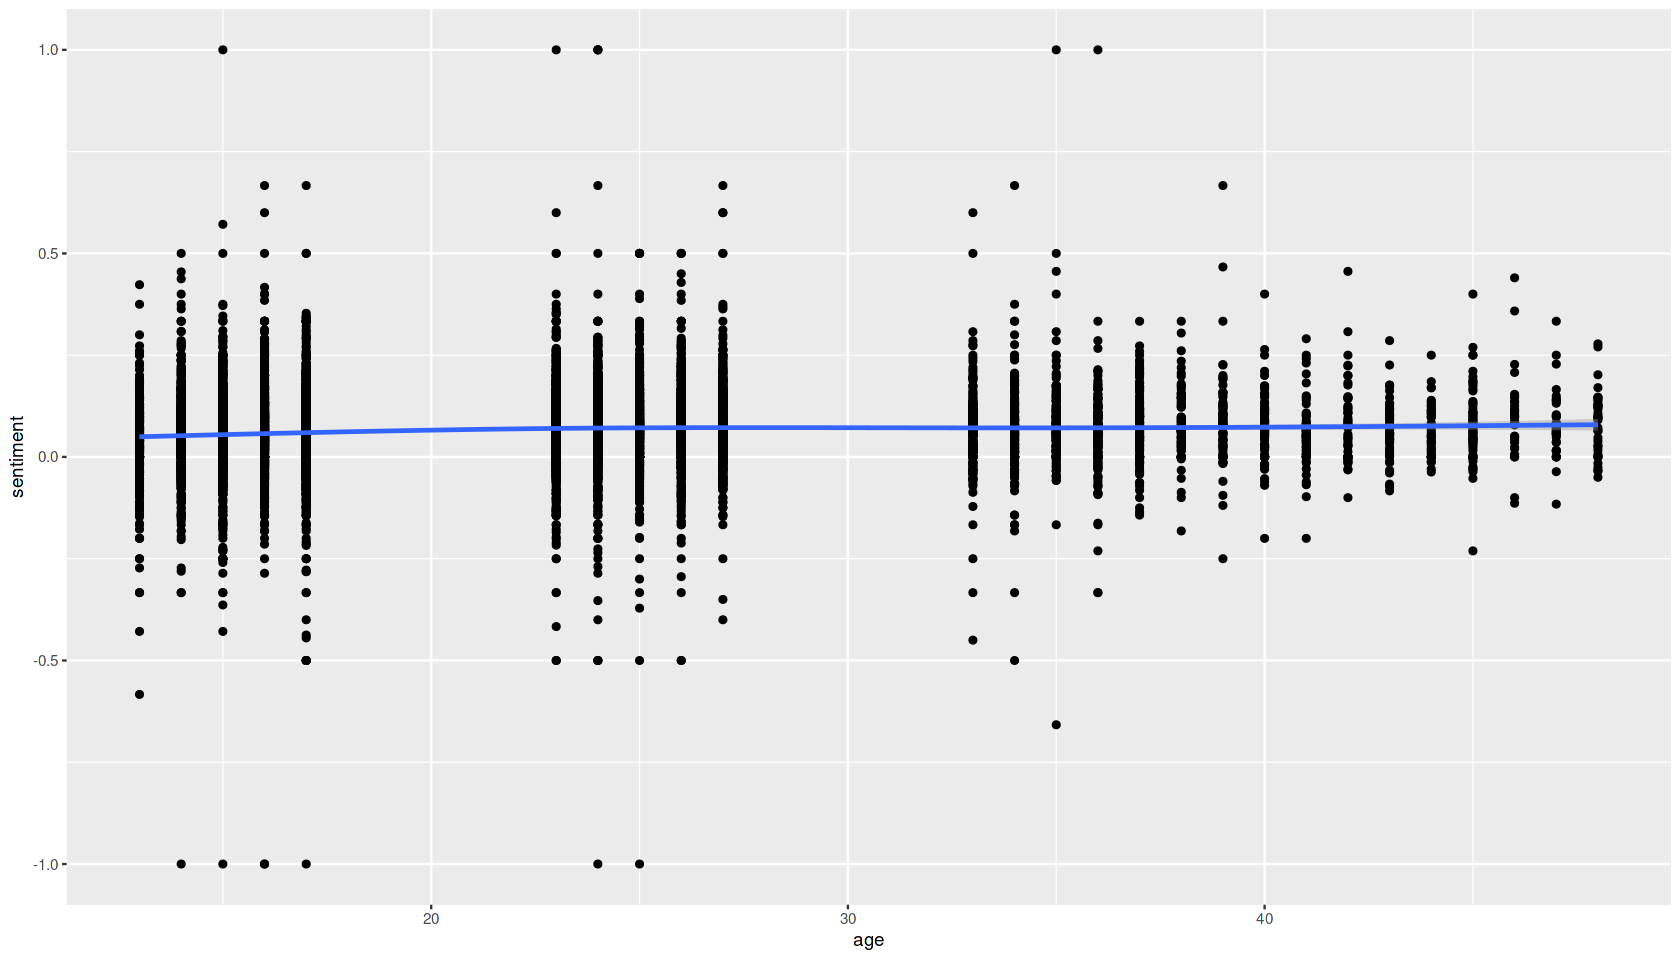

In [25]:
# Plotting Sentiment Score to Age
ggplot(blog, aes(y = sentiment, x = age)) +
    geom_point() + geom_smooth()

From this graph, it seems that the sentiment score has a higher tendency to be more extreme for ages 13-27 compared to those ages 30+. Whilst for age 30+, the text seems to be more neutral and positive. Overall, however, the sentiment score maintains a pretty similar level across all ages.

### Age Group

Let's explore how many observations of each age group is in this data set. Ideally, we would want a approximately even amount of both age groups.

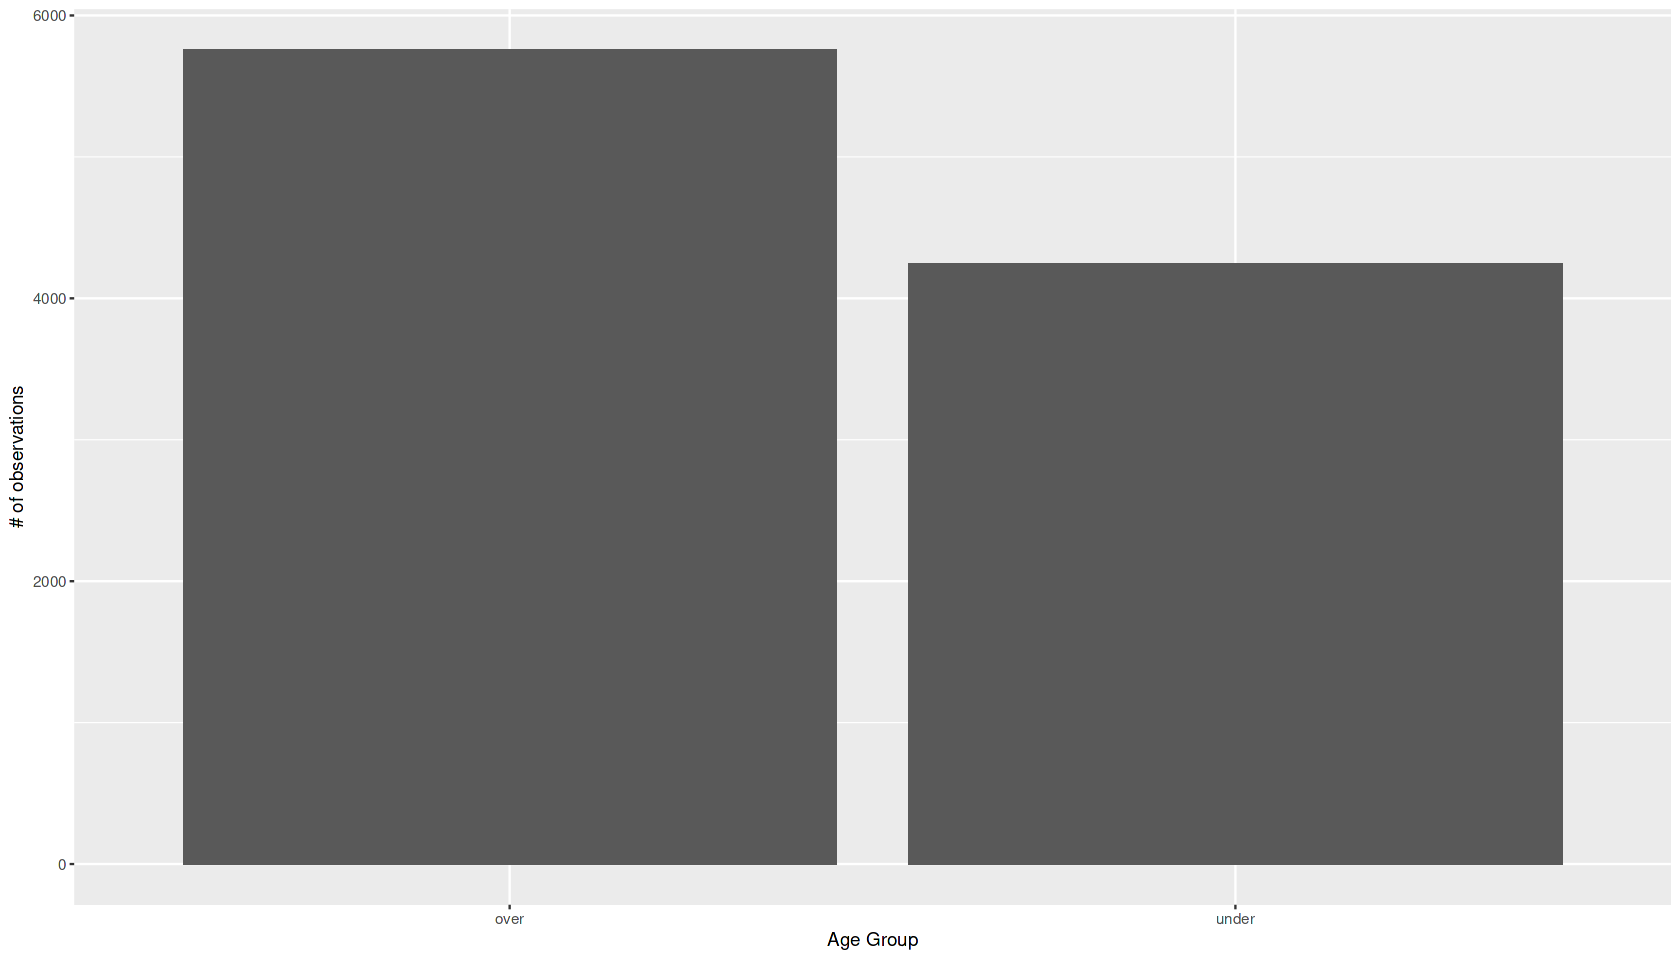

In [26]:
blog %>%
  ggplot(aes(x=age_group)) + 
  geom_bar() +
  labs(x = "Age Group", y = "# of observations")

So we can see that there are much more observations of the `over` group. However, there are substantial amount of data from both groups (4,000+) so as long as we stratify our data by `age_group`, it should be adequate.

### Correlation Plot

Let's examine the relationships between all our numeric predictor variables!

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


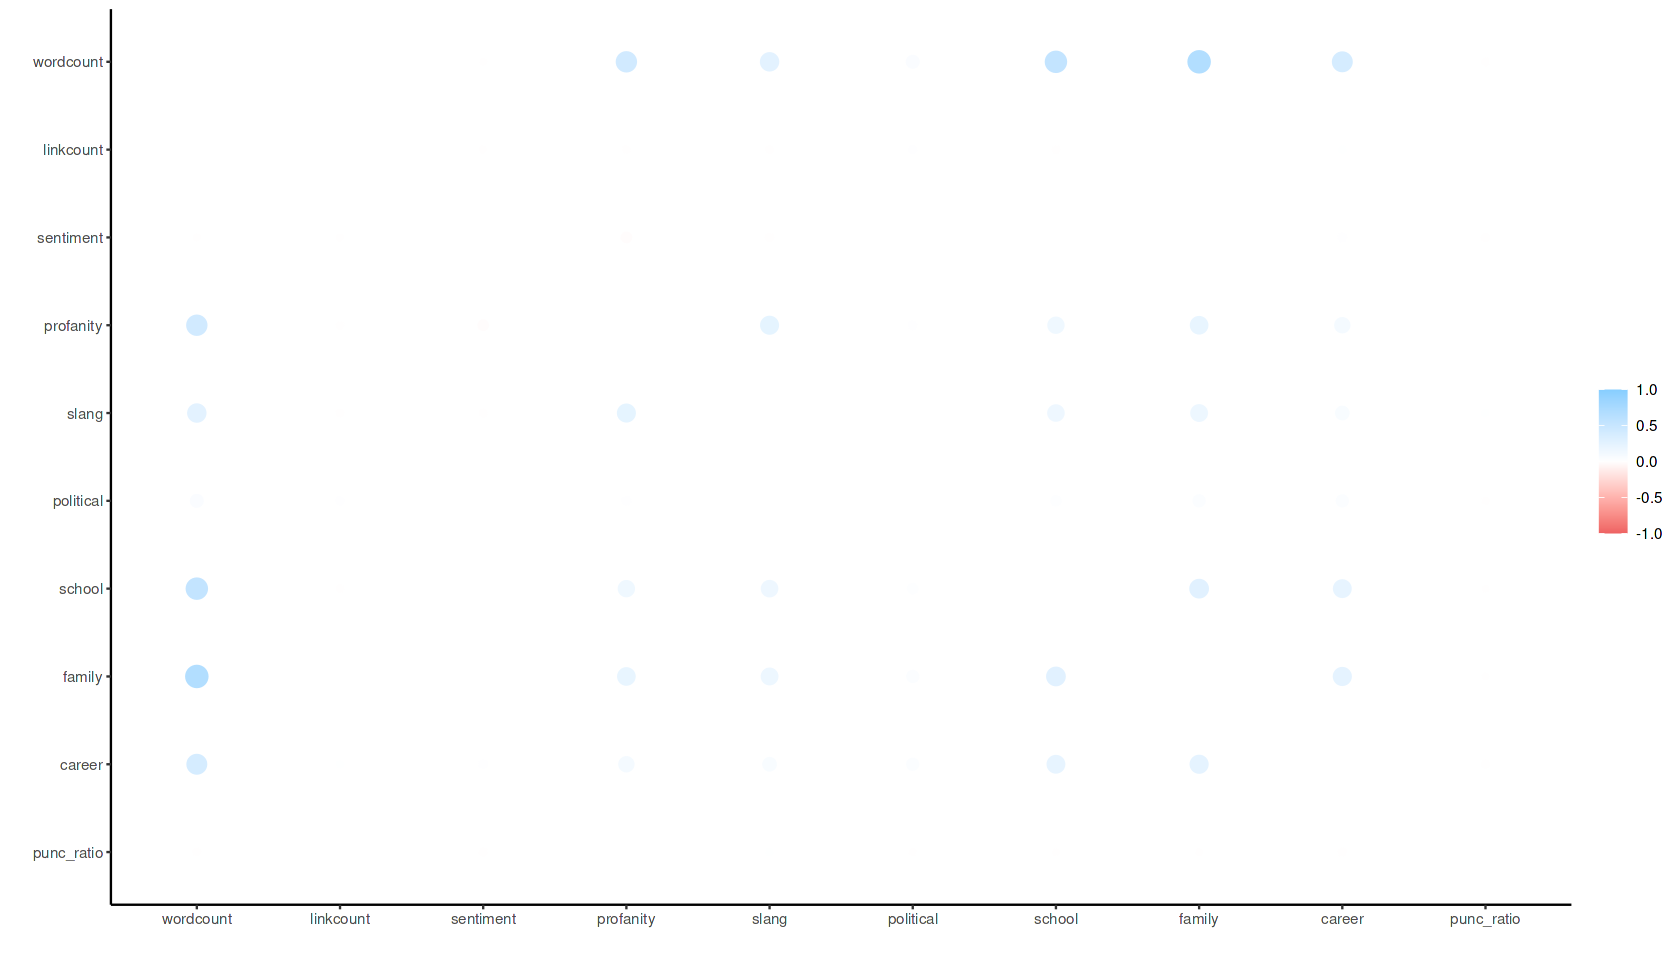

In [27]:
# Correlation Plot
cor_plot <- blog %>%
  select(wordcount, linkcount, sentiment, profanity, slang, political, school, family, career, punc_ratio) %>%
  correlate()

rplot(cor_plot)


We can see that many of the variables are positively correlated. The most correlated variables are `family` and `wordcount` as well as `school` and `wordcount`. This shouldn't be a big problem as it logically makes sense that a higher word count would correlate to a higher chance of these life stage related words appearing in them. It is probably that if one of these words are used, it will be likely that it is reiterated since it could be the topic at hand. The other variables seem to be either not correlated at all or only be slightly correlated so that shouldn't cause a huge issue during model building.

# Setting Up Models

We have now finish preparing all our variables for model building! We can now start setting up our models by performing out train/test split, creating our recipe, and generating folds for a k-fold cross validation.


## Train/Test Split

To preface any model building, we have to first do a train/test split on our data. Let's do a 70/30 split on our `blog` data, stratifying on variable `age_group`. This means that 70% of our data will go into the training set while the other 30% will go towards our testing set. Our strata variable `age_group` will guarantee that the proportions of both age groups are distributed equally for both training and testing set. That is, it prevents one of the test/train split from having too many of one age group and none of the other age group. Also, we have perform a test/train split to prevent over-fitting since we are not using all of the data to learn. A 70/30 split allows us to have a substantial amount of data to train our models on while still have enough to test it on.

In [28]:
# Set seed so we can reproduce our results
set.seed(1213)

# Performing a 70/30 Train/Test Split
blog_split <- initial_split(blog, prop = 0.7, strata = age_group)
blog_train <- training(blog_split)
blog_test <- testing(blog_split)

We should now verify that the data was split correctly.

In [29]:
dim(blog_train)
dim(blog_test)

[1] 6999   18

[1] 3001   18

So the training set has approximated 70% of the data while the testing data has approximated 30%. So, the data has been split exactly as we wanted it to.

## Recipe Creation

For all our models, we will be using the same predictor variables, outcome variable, and conditions so we should now create a recipe that we can universally use for all models. Each model will use this recipe to train our prediction model.

We will be using 10 predictor variables: `slang`, `school`, `career`, `family`, `sentiment`, `wordcount`, `profanity`, `punc_ratio`, `linkcount`, `political`. From the exploratory data analysis, we have found that it should be fine to use all predictor variables since none of them are that highly correlated.

We will center, scale, and normalize all our predictors. We will also impute missing `sentiment` data during recipe creation.

In [30]:
# Recipe Creation
blog_recipe <- recipe(age_group ~ linkcount + wordcount+ sentiment + slang + political + punc_ratio + career + family + profanity + school, blog_train) %>%
  step_center(all_predictors()) %>% # centering
  step_scale(all_predictors()) %>% # scaling
  step_normalize(all_numeric_predictors()) %>% # normalizing
  step_impute_linear(sentiment, impute_with=imp_vars(punc_ratio)) #imputing sentiment

# Prepping Recipe
prep(blog_recipe) %>% bake(new_data = blog_train) %>% 
  group_by(age_group) %>% 
  summarise(count = n())

# Previewing our recipe
prep(blog_recipe) %>% bake(new_data = blog_train)

age_group,count
<fct>,<int>
over,4029
under,2970


linkcount,wordcount,sentiment,slang,political,punc_ratio,career,family,profanity,school,age_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.4762877,-0.55897057,-0.64241389,-0.2077752,-0.1293327,-0.10307277,-0.42609204,-0.29731789,-0.1866257,-0.3278557,over
-0.2796165,0.86833954,0.62690537,-0.2077752,-0.1293327,-0.13280027,0.92741091,0.97635570,-0.1866257,-0.3278557,over
-0.2796165,-0.03922179,-1.06851499,-0.2077752,-0.1293327,-0.10999591,-0.42609204,0.21215155,-0.1866257,-0.3278557,over
-0.2796165,-0.19114836,0.48505718,-0.2077752,-0.1293327,-0.10034308,-0.42609204,-0.29731789,-0.1866257,-0.3278557,over
-0.2796165,1.56400329,-0.34263923,-0.2077752,1.5647395,0.23712618,9.04842860,0.97635570,0.4192154,1.7904568,over
-0.2796165,0.15468448,-0.37168667,-0.2077752,-0.1293327,-0.02092580,1.37857856,0.21215155,-0.1866257,-0.3278557,over
-0.2796165,-0.19114836,-0.27604658,-0.2077752,-0.1293327,-0.12218064,0.02507561,-0.29731789,-0.1866257,-0.3278557,over
-0.2796165,0.51850863,0.36754331,-0.2077752,-0.1293327,-0.11303247,-0.42609204,0.72162098,-0.1866257,1.7904568,over
-0.2796165,-0.40504497,0.41708075,-0.2077752,-0.1293327,-0.10820930,-0.42609204,-0.04258317,-0.1866257,-0.3278557,over


## K-Fold Cross Validation

We will now create 10 folds, again stratifying of `age_group`, to conduct a 10-fold stratified cross validation. This means that R will designate each observation in the training data to one of the 10 folds. With each fold, a testing set will be created made up of that folds and the other k-1 folds are used as the training set for that fold. We will ultimately have k total folds at the end.

We use a K-fold cross validation since it gives a better idea of perfomance accuracy rather than just fitting and testing models.

In [31]:
# Creating folds

blog_folds <- vfold_cv(blog_train, v=10)

# Model Building

It has finally come time to build our models! As stated in the project outline, we will be trying nine different machine learning techniques with the same recipe and then comparing results to see which model achieved the highest accuracy. I will be using `roc_auc` as the metric for all models since it will give us the highest level of efficiency for our binary classification model when the data is not balanced perfectly. `roc_auc` calculates the area under the receiver operating characteristic curve, which magnifies the performancy of our classification model at all classification thresholds.

Some of models will take a long time to run and we have many models to run; Thus, I will run my models outside of the .Rmd, store the results, and then load them in my .Rmd to avoid rerunning the models every time. 

## Fitting the models

Each model follows a very similar process in building. I will detail each step before performing them:

1. Set up the model by setting what type of model, engine, and mode we want. The mode will always be "classification" for this project. For many of the models, we will also have to specify which parameters we want to tune and how many levels of tuning.

In [32]:
# Logistic Regression
log_model <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Lasso Regression
# Tuning penalty and setting mixture to 1 for lasso regression
lasso_spec <- logistic_reg(mixture = 1, penalty = tune()) %>%
  set_mode("classification") %>%
  set_engine("glmnet")

# Ridge Regression
# Tuning penalty and setting mixture to 0 for ridge regression
ridge_spec <- logistic_reg(mixture = 0, penalty = tune()) %>%
  set_mode("classification") %>%
  set_engine("glmnet")

# Elastic Net
# Tuning both penalty and mixture
enlm_spec <- logistic_reg(mixture = tune(), penalty = tune()) %>%
  set_mode("classification") %>%
  set_engine("glmnet")

# K Nearest Neighbors
# Tuning the number of neighbors
knn_model <- nearest_neighbor(neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# Quadratic Discriminant Analysis
qda_model <- discrim_quad() %>%
  set_mode("classification") %>%
  set_engine("MASS")

# Linear Discriminant Analysis
lda_model <- discrim_linear() %>%
  set_mode("classification") %>%
  set_engine("MASS")

# Gradient-Boosted Trees
# Tuning mtry, trees, and learn_rate
bt_spec <- boost_tree(mtry = tune(), 
                           trees = tune(), 
                           learn_rate = tune()) %>%
  set_engine("xgboost") %>% 
  set_mode("classification")

# Random Forest
# Tuning mtry, trees, and min_n
rf_spec <- rand_forest(mtry = tune(), 
                           trees = tune(), 
                           min_n = tune()) %>%
  set_engine("ranger") %>% 
  set_mode("classification")

2. Set up workflows for each model and add the recipe and respective model.

In [33]:
# Logistic Regression
log_wkflow <- workflow() %>%
  add_model(log_model) %>%
  add_recipe(blog_recipe)

# Lasso Regression
lasso_wkflow <- workflow() %>%
  add_model(lasso_spec) %>%
  add_recipe(blog_recipe)

# Ridge Regression
ridge_wkflow <- workflow() %>%
  add_model(ridge_spec) %>%
  add_recipe(blog_recipe)

# Elastic Net
enlm_wkflow <- workflow() %>%
  add_model(enlm_spec) %>%
  add_recipe(blog_recipe)

# K Nearest Neighbors
knn_wkflow <-workflow() %>%
  add_model(knn_model) %>%
  add_recipe(blog_recipe)

# Quadratic Discriminant Analysis
qda_wkflow <- workflow() %>%
  add_model(qda_model) %>%
  add_recipe(blog_recipe)

# Linear Discriminant Analysis
lda_wkflow <- workflow() %>%
  add_model(lda_model) %>%
  add_recipe(blog_recipe)

# Gradient-Boosted Trees
bt_wf <- workflow() %>% 
  add_model(bt_spec) %>% 
  add_recipe(blog_recipe)

# Random Forest
rf_wf <- workflow() %>% 
  add_model(rf_spec) %>% 
  add_recipe(blog_recipe)

3. Create tuning grids to indicate the ranges of all the parameters we are tuning and how many levels of each. Our logistic regression, QDA, and LDA models will not require grids since we are not tuning any parameters for these.

In [34]:
# Lasso Regression
penalty_grid <- grid_regular(penalty(range = c(-5,5)), levels = 40)

# Ridge Regression
# same as Lasso Regression grid

# Elastic Net
# default values of penalty
enlm_grid <- grid_regular(mixture(range=c(0,1)), penalty(), levels=10) 

# K Nearest Neighbors
knn_grid <- grid_regular(neighbors(range = c(1, 20)), levels=10)

# Gradient-Boosted Trees
bt_grid <- grid_regular(mtry(range = c(1, 6)), 
                        trees(range = c(50,200)),
                        learn_rate(range = c(-10, -1)),
                        levels = 5)

# Random Forest
rf_grid <- grid_regular(mtry(range = c(1, 4)), 
                        trees(range = c(50, 200)),
                        min_n(range = c(10, 20)),
                        levels = 6)

4. Tune each model and state the respective workflow, k-fold cross vaidation folds, and tuning grid.
Again, no tuning is needed for our logistic regression, QDA, and LDA models.

In [35]:
# Lasso Regression
tune_lasso <- tune_grid(
  object = lasso_wkflow,
  resamples = blog_folds,
  grid = penalty_grid,
)

# Ridge Regression
tune_ridge <- tune_grid(
  object = ridge_wkflow,
  resamples = blog_folds,
  grid = penalty_grid,
)

# Elastic Net
tune_enlm <- tune_grid(
  object = enlm_wkflow,
  resamples = blog_folds,
  grid = enlm_grid
)

# K Nearest Neighbors
tune_knn <- tune_grid(
  object = knn_wkflow,
  resamples = blog_folds,
  grid = knn_grid,
)

# Gradient-Boosted Trees
tune_bt <- tune_grid(
  bt_wf,
  resamples = blog_folds,
  grid = bt_grid,
  metrics = metric_set(yardstick::roc_auc)
)

# Random Forest
# tune_rf <- tune_grid(
#   rf_wf,
#   resamples = blog_folds,
#   grid = rf_grid
# )

5. Save our tuned models results to an .RDA file to avoid rerunning the model every time.

In [36]:
# use save() to save

# Lasso Regression
save(tune_lasso, file = "/kaggle/working/tune_lasso.rda")

# Ridge Regression
save(tune_ridge, file = "/kaggle/working/tune_ridge.rda")

# Elastic Net
save(tune_enlm, file = "/kaggle/working/tune_enlm.rda")

# K Nearest Neighbors
save(tune_knn, file = "/kaggle/working/tune_knn.rda")

# Gradient-Boosted Trees
save(tune_bt, file = "/kaggle/working/tune_bt.rda")

# Random Forest
# save(tune_rf, file = "/kaggle/working/tune_rf.rda")

# Results of our Models

Finally, we have successfully chosen adequate tuning parameters and ran all models! Please note that since we were constricted to the MacBook-level computing power, I had to choose parameters and levels that were slightly restrictive. Still, we were able to choosing ones that should perform quite well. Now, let's load back in the saved files to analyze our performances! Furthermore, it seems that Kaggle is unable to run the Random Forest model as it seems to be large, however it was able to run on a local Rstudio environment.

In [37]:
# load() to load results

# Lasso Regression
load("/kaggle/working/tune_lasso.rda")

# Ridge Regression
load("/kaggle/working/tune_ridge.rda")

# Elastic Net
load("/kaggle/working/tune_enlm.rda")

# K Nearest Neighbors
load("/kaggle/working/tune_knn.rda")

# Gradient-Boosted Trees
load("/kaggle/working/tune_bt.rda")

# Random Forest
# load("/kaggle/working/tune_rf.rda")

## Model Autoplots
The `autoplot` function will be extremely helpful in visualizing the results of all our tuned models. This allows us to visually see the effects that the change in parameters have on our metric, roc_auc.

### K Nearest Neighbor Plot

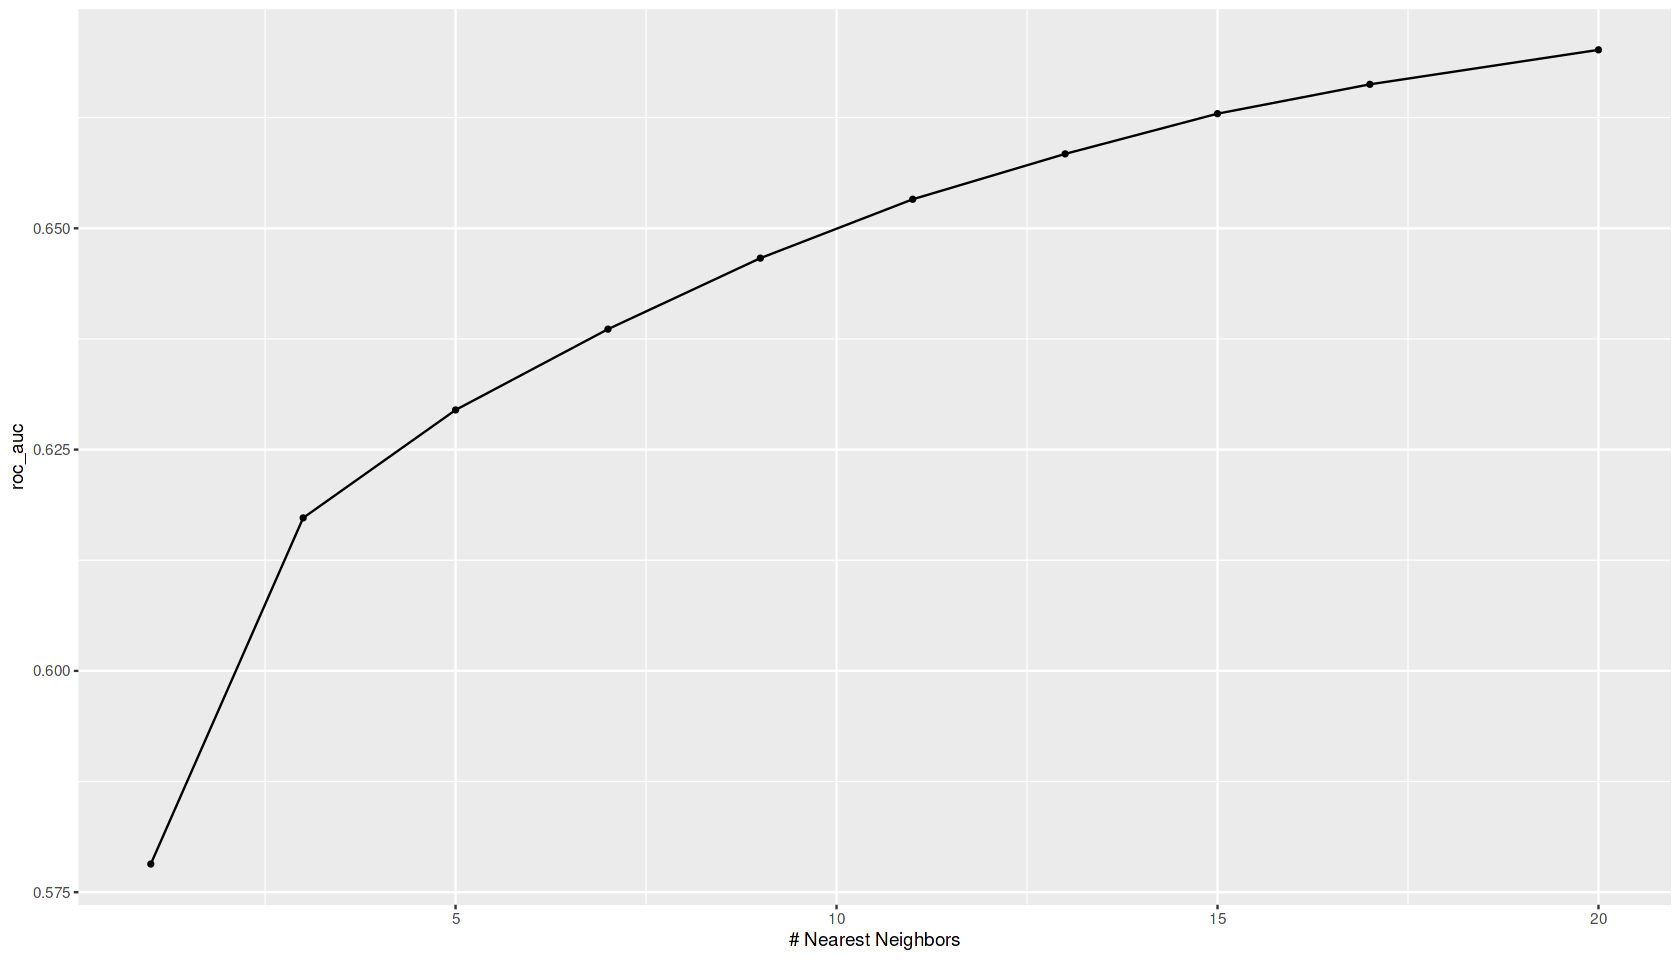

In [38]:
# Using autoplot() and setting metric to roc_auc
autoplot(tune_knn, metric = 'roc_auc')

For our KNN model, we had tuned 1-20 number of nearest neighbors at 10 different levels. We can see here that the ROC_AUC increases as the number of nearest neighbors increases, peaking at the last number `neighbors=20` with a ROC AUC of approximately 0.685.


### Random Forest Model

In [39]:
# Using autoplot() and setting metric to roc_auc
# autoplot(tune_rf, metric = "roc_auc")

For our random forest model, we tuned 3 different parameters:
1. `mtry` = number of predictors that is randomly sampled at each split when creating the tree models.
2. `trees` = numbers of trees generated in the ensemble.
3. `min_n` = minimum number of data points in a node that is needed for the node to be split further.

We can see that the number of trees does not really affect the ROC AUC that significantly. It seems that as `mtry` decreases, the ROC AUC increases (which means performance improves). As `min_n` increases, it also seems like ROC AUC increases. Thus, the best performing random forest model seems to be at `mtry = 1`, `min_n = 14`, and `trees = 50`.

### Elastic Net Plot

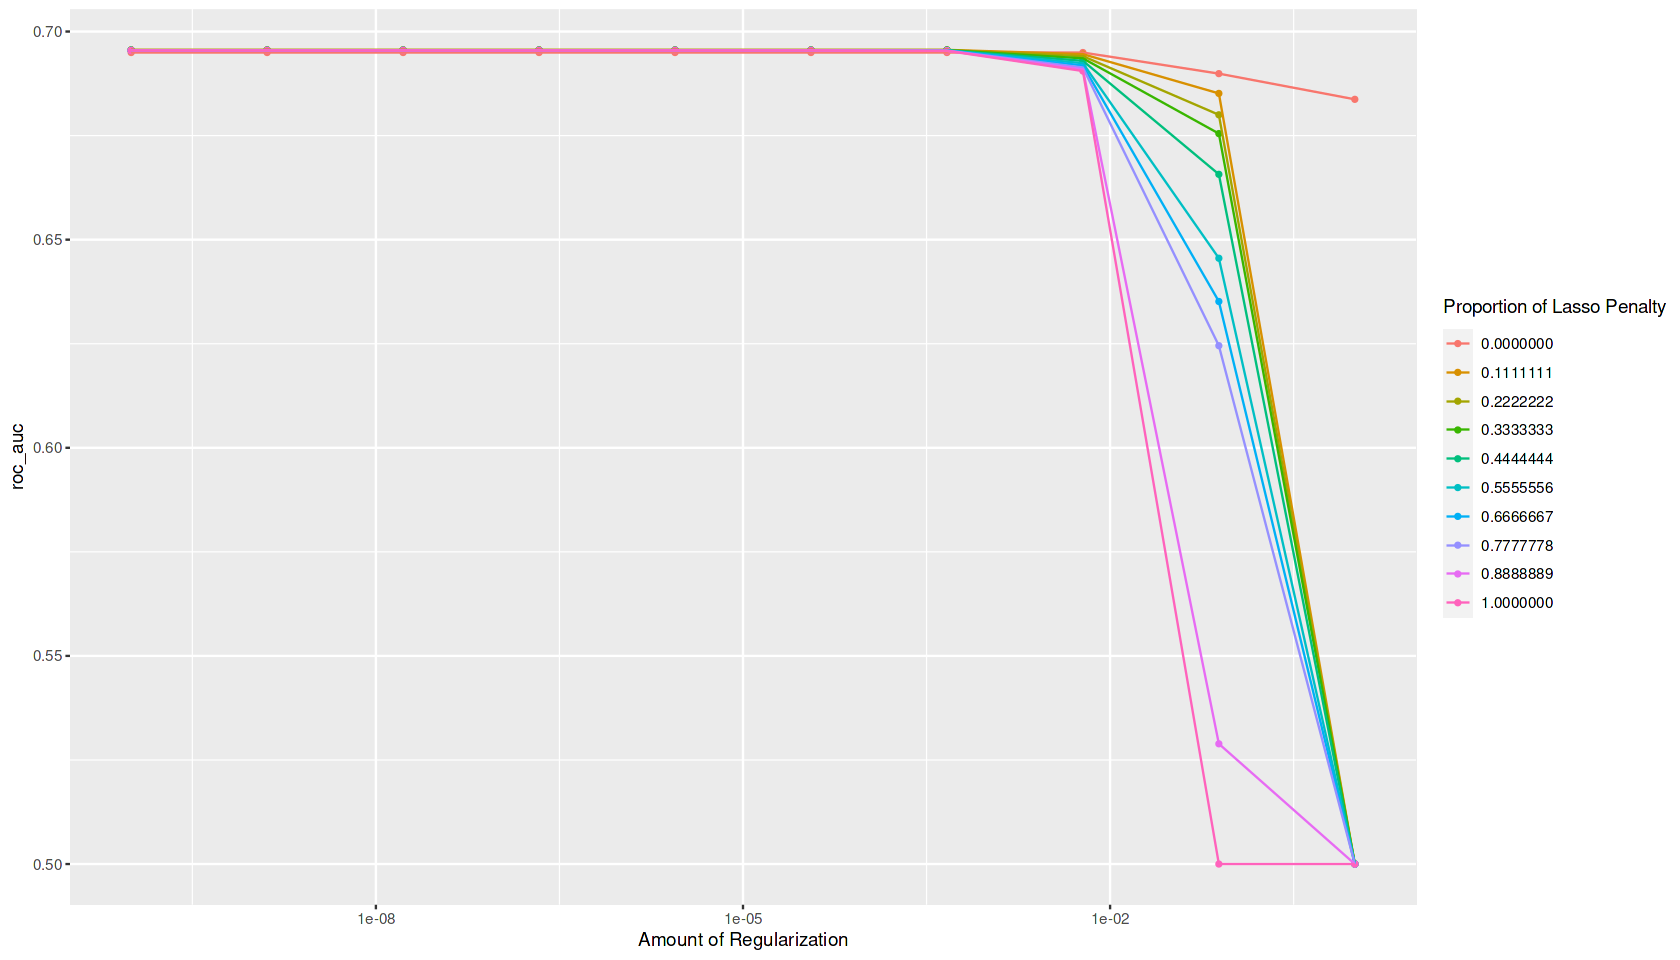

In [40]:
# Using autoplot() and setting metric to roc_auc
autoplot(tune_enlm, metric = 'roc_auc')

For our elastic net model, we had tuned our parameters mixture and penalty to 10 different levels. From our plot, it seems that the lower the lasso penalty, the better our model performs. As the penalty increases, the ROC AUC decreases since the coefficients of the predictors are reduces to values that are too small, making it harder to predict accurately. It seems that when mixture is closer to 0, our model performs the best.

### Gradient-Boosted Trees Plot

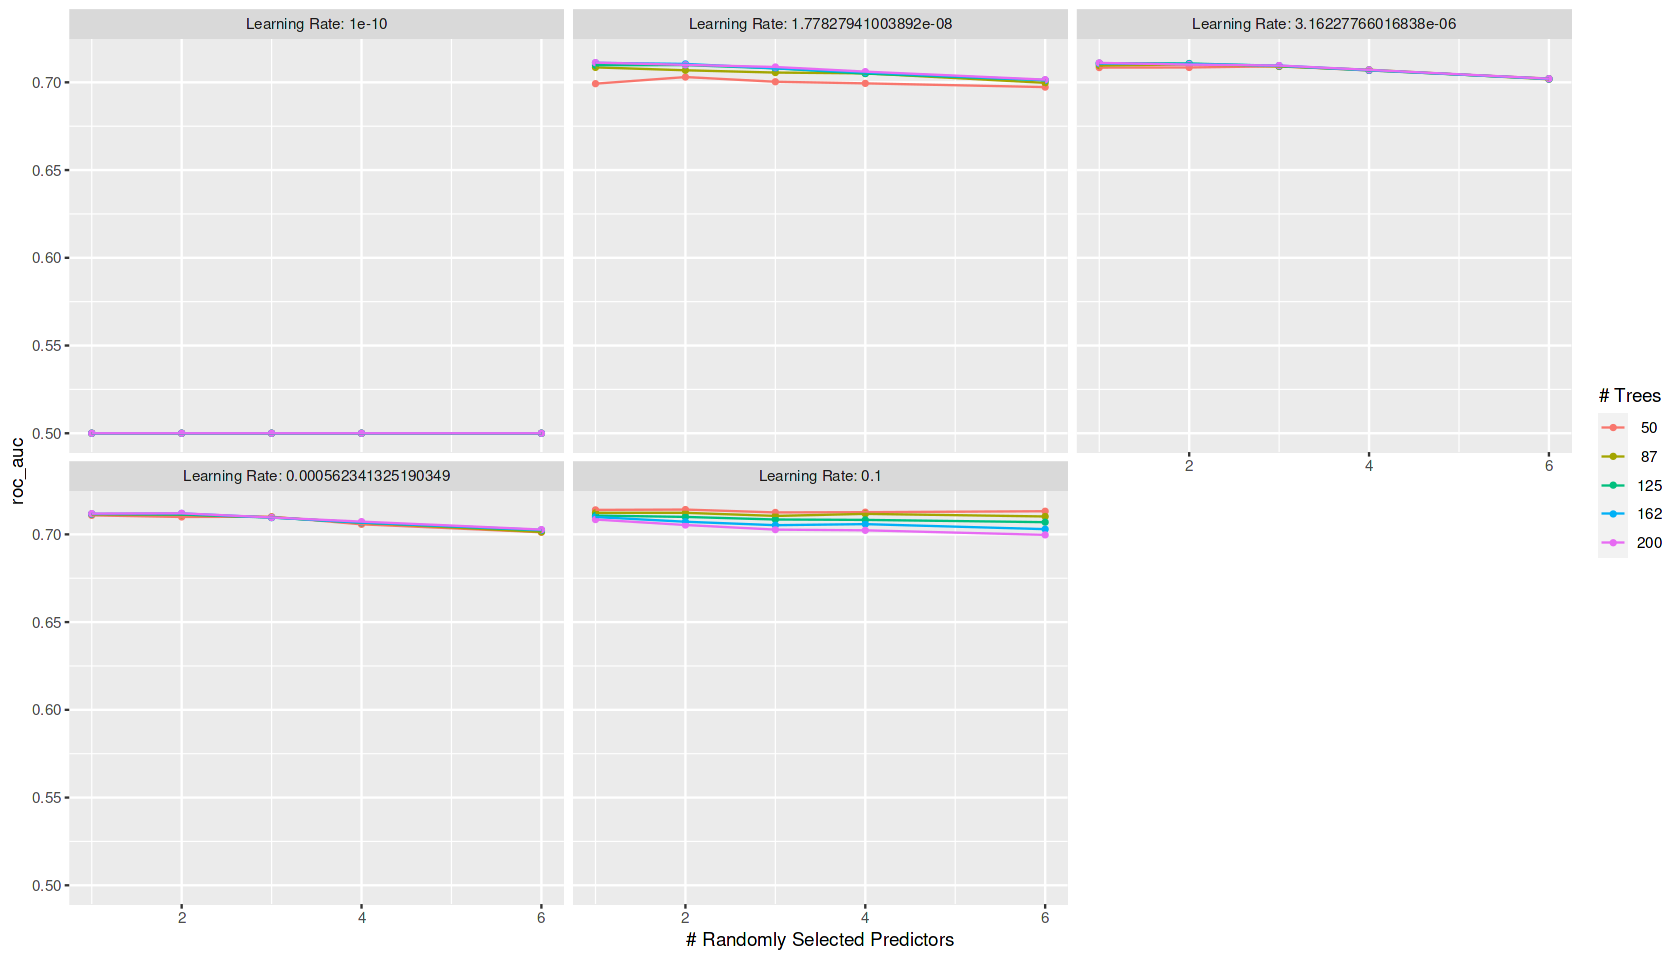

In [41]:
# Using autoplot() and setting metric to roc_auc
autoplot(tune_bt, metric = 'roc_auc')

For our boosted trees model, we had tuned 5 different levels of 3 parameters:
1. `trees` = number of trees within each ensemble.
2. `learn_rate` = rate at which the boosting algorithm adapts with each iteration, also known as the shrinkage parameter. 
3. `mtry` = number of predictors that will be randomly sampled with each split when creating the tree models.

From our plot, we can see that learning rate of 0.1 seems to work the best. For many of the learning rates, the number of trees did not have a significant effect on roc_auc. On average, ROC AUC seems to decrease as the number of predictors increases. Overall, the best performing boosted tree model seems to be at `mtry = 2`, `learn_rate = 0.1`, and `trees = 50`.


## Accuracy of Our Models

Now let's compare the best ROC AUC value for each of the 9 models. We will do this by creating a tibble of the estimate for the ROC AUC of each machine learning technique's optimal model. 

In [42]:
# Logistic Regression
# log_fit <- fit_resamples(log_wkflow, resamples = blog_folds) # fit the logistic regression model
# Select ROC AUC score using slice() and select()
# log_auc <- collect_metrics(log_fit) %>%
#   slice(2) 

# Lasso Regression
lasso_auc <- collect_metrics(tune_lasso) %>%
  arrange(mean) %>% dplyr::slice(80) 

# Ridge Regression
ridge_auc <- collect_metrics(tune_ridge) %>%
  arrange(mean) %>% dplyr::slice(80) 

# Elastic Net
en_auc <- collect_metrics(tune_enlm) %>%
  arrange(mean) %>%
  dplyr::slice(200) 

# K Nearest Neighbors
knn_auc <- collect_metrics(tune_knn) %>%
  arrange(mean) %>%
  dplyr::slice(20) 

# Boosted Trees
bt_auc <- collect_metrics(tune_bt) %>%
  arrange(mean) %>% dplyr::slice(125) 

# Random Forest
# rf_auc <- collect_metrics(tune_rf) %>%
#   arrange(mean) %>%
#   slice(288)

# Linear Discriminant Analysis
# Fit LDA model
lda_fit <- fit_resamples(lda_wkflow, resamples = blog_folds)
# Select ROC AUC score using slice() and select()
lda_auc <- collect_metrics(lda_fit) %>%
  dplyr::slice(2) 
  
# Quadratic Discriminant Analysis
# Fit QDA model
qda_fit <- fit_resamples(qda_wkflow, resamples = blog_folds)
# Select ROC AUC score using slice() and select()
qda_auc <- collect_metrics(qda_fit) %>%
  dplyr::slice(2)

In [43]:
# Creating a tibble
compare <- tibble(Model = c("Lasso Regression", "Ridge Regression", "Elastic Net", "K Nearest Neighbors", "Boosted Trees", "LDA", "QDA"), ROC_AUC = c(lasso_auc$mean, ridge_auc$mean, en_auc$mean, knn_auc$mean, bt_auc$mean, lda_auc$mean, qda_auc$mean))

# Arranging our models from great ROC_AUC score to least
compare <- compare %>% 
  arrange(desc(ROC_AUC))

compare

Model,ROC_AUC
<chr>,<dbl>
Boosted Trees,0.7141328
Elastic Net,0.6956042
Lasso Regression,0.6954473
Ridge Regression,0.6949604
LDA,0.6822935
K Nearest Neighbors,0.6701588
QDA,0.6347673


Let's visualize these results.

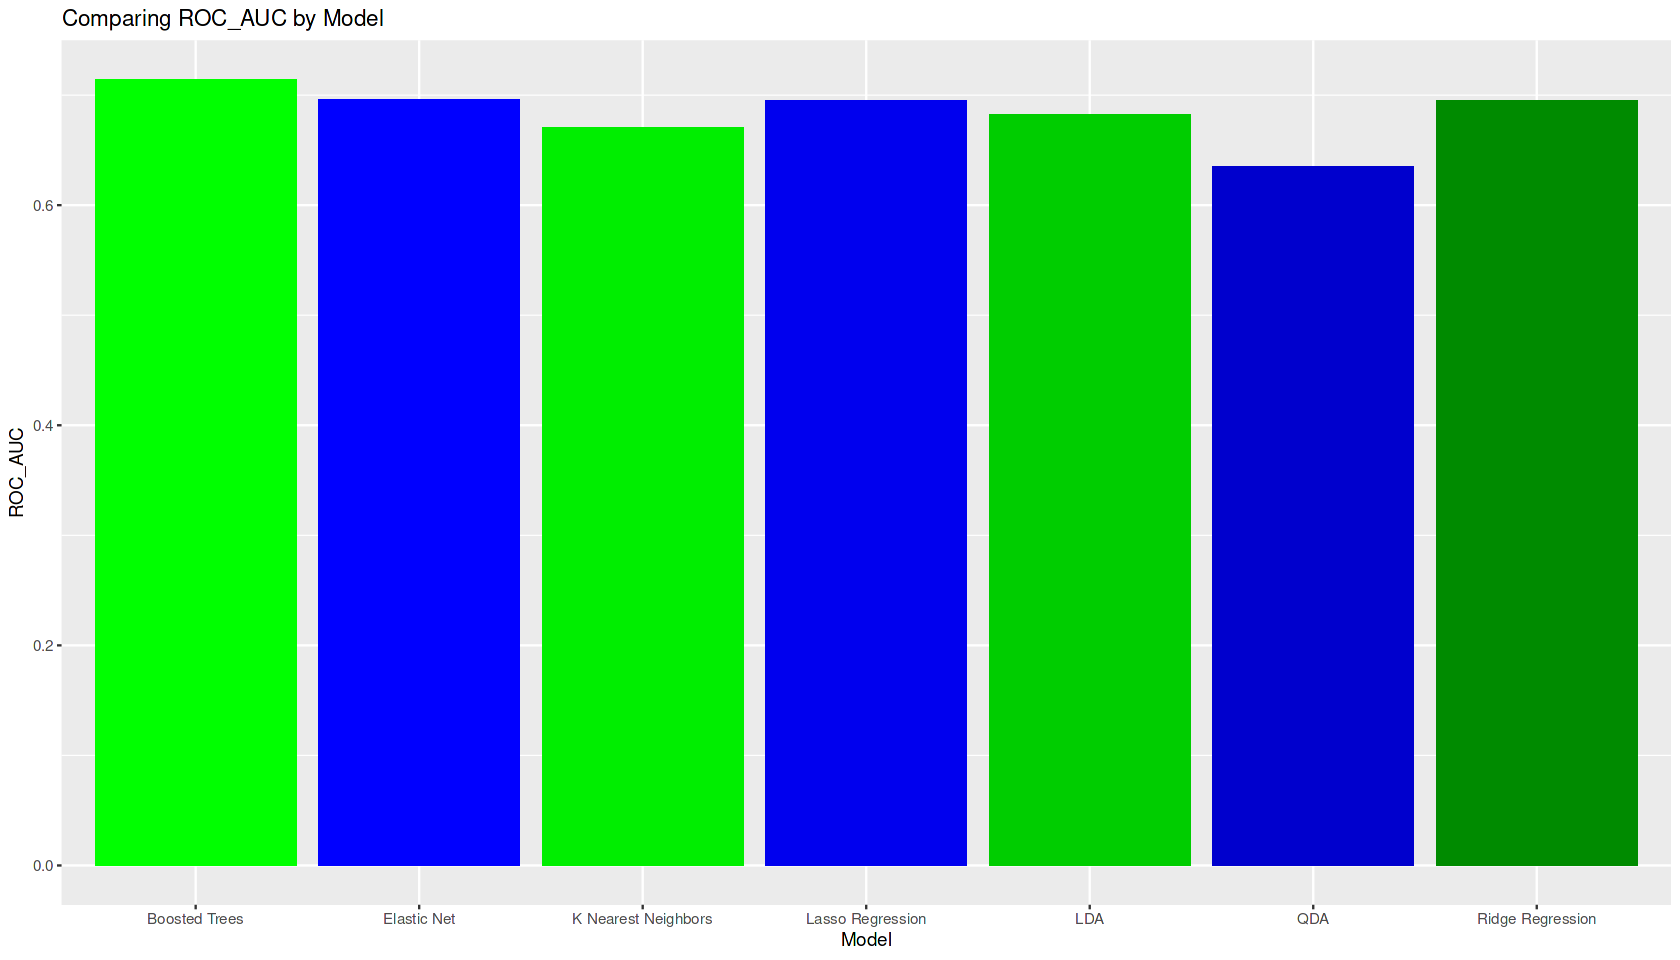

In [44]:
# Creating a barplot of ROC_AUC values
ggplot(compare, aes(x=Model, y=ROC_AUC)) +
  geom_bar(stat = "identity", aes(fill = Model)) +
  scale_fill_manual(values = c("green1", "blue1", "green2", "blue2", "green3", "blue3", "green4")) +
  theme(legend.position = "none") +
  labs(title = "Comparing ROC_AUC by Model")

From the performance of our models on the cross-validation data, it seems that Random Forest is our best performing model, followed by the Boosted Trees model that performed almost just as well! Therefore, we will be analyzing the results of both these models. We should also note that the QDA model performs much worse compared to all the other models, which suggests that the data does not follow gaussian distribution.


# Results of the Best Models

## Parameter Details
 
So our random forest model ends up being the best performing model, but which tuned parameters was chosen that yield these results?

In [45]:
# Using show_best() to choose the random forest model with the largest ROC_AUC
# show_best(tune_rf, n = 1)

Here, we can see that our best performing model has parameters tuned at `mtry = 1`, `trees = 50`, and `min_n = 14`. This means it has 1 predictor, 50 trees, and minimum node size of 14 had the best performance with a ROC AUC value of 0.7177!


Our second best performing model was the Boosted Trees model, let's see which tuned parameters was chosen!

In [46]:
# Using show_best() to choose the boosted trees model with the largest ROC_AUC
show_best(tune_bt, n = 1)

mtry,trees,learn_rate,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,50,0.1,roc_auc,binary,0.7141328,10,0.006240809,Preprocessor1_Model046


We can see that best boosted tree models has 2 predictors, 50 trees, and a 0.1 shrinkage parameter. This came together to give us the resulting ROC AUC score of 0.7144!

## Fitting to Training Data

Now, we will first take these two models and fit it to the training data to train them one last time to the entire training data set (rather than just one fold). 

In [47]:
# Random Forest
# Assign best RF model to best_rf_model
# best_rf_model <- select_best(tune_rf, metric="roc_auc")
# Fit to training data
# rf_final_wkflow <- finalize_workflow(rf_wf, best_rf_model)
# rf_final_fit <- fit(rf_final_wkflow, data = blog_train)

# Boosted Trees
# Assign best BT model to best_bt_model
best_bt_model <- select_best(tune_bt, metric="roc_auc")
# Fit to training data
bt_final_wkflow <- finalize_workflow(bt_wf, best_bt_model)
bt_final_fit <- fit(bt_final_wkflow, data = blog_train)

## Testing the Model
Now, we can continue by testing our final two models on the testing data set, which is data the model has not seen yet! This way, we can properly get insight on how the model actually performs.

In [48]:
# Random Forest
# Comparing predicted vs actual values
# final_rf_test <- augment(rf_final_fit, blog_test) %>% 
#   dplyr::select(age_group, starts_with(".pred")) %>%
#   roc_auc(truth=age_group, .pred_over) %>%
#   dplyr::select(.estimate)

# final_rf_test # Call results

In [49]:
# Boosted Trees
# Comparing predicted vs actual values
final_bt_model_test <- augment(bt_final_fit, blog_test) %>% 
  dplyr::select(age_group, starts_with(".pred")) %>%
  roc_auc(truth = age_group, .pred_over) %>%
  dplyr::select(.estimate)

final_bt_model_test # Call Results

.estimate
<dbl>
0.707766


We can see that both random forest and boosted trees models performed similarly on the testing set compared to the cross-validation folds with ROC AUC scores of 0.7109 and 0.7104, respectively. Our models have done pretty well considering the difficult task we attempted to tackle of age prediction through social media posts. It could definitely be improved using more elaborate natural language processing techniques such as semantic role labeling and grammar induction. Nevertheless, these results proved to be a decent start to the possibilities of using machine learning to predict age from text!



## ROC Curve

Let's plot our ROC curve to visualize our AUC scores. Ideally, we would want a curve that is arched as left as possible and above the diagonal line. A perfect AUC score would have a ROC curve that resembles a right angle with the intersection at the top left corner. 

Stating off with our random forest ROC curve:

In [50]:
# Random Forest
# rf_roc <- augment(rf_final_fit, blog_test) %>% 
#  dplyr::select(age_group, starts_with(".pred"))
# Compute ROC curve
# roc_curve(rf_roc, truth = age_group, .pred_over) %>% 
#  autoplot() #plot

Then our boosted trees model ROC curve:

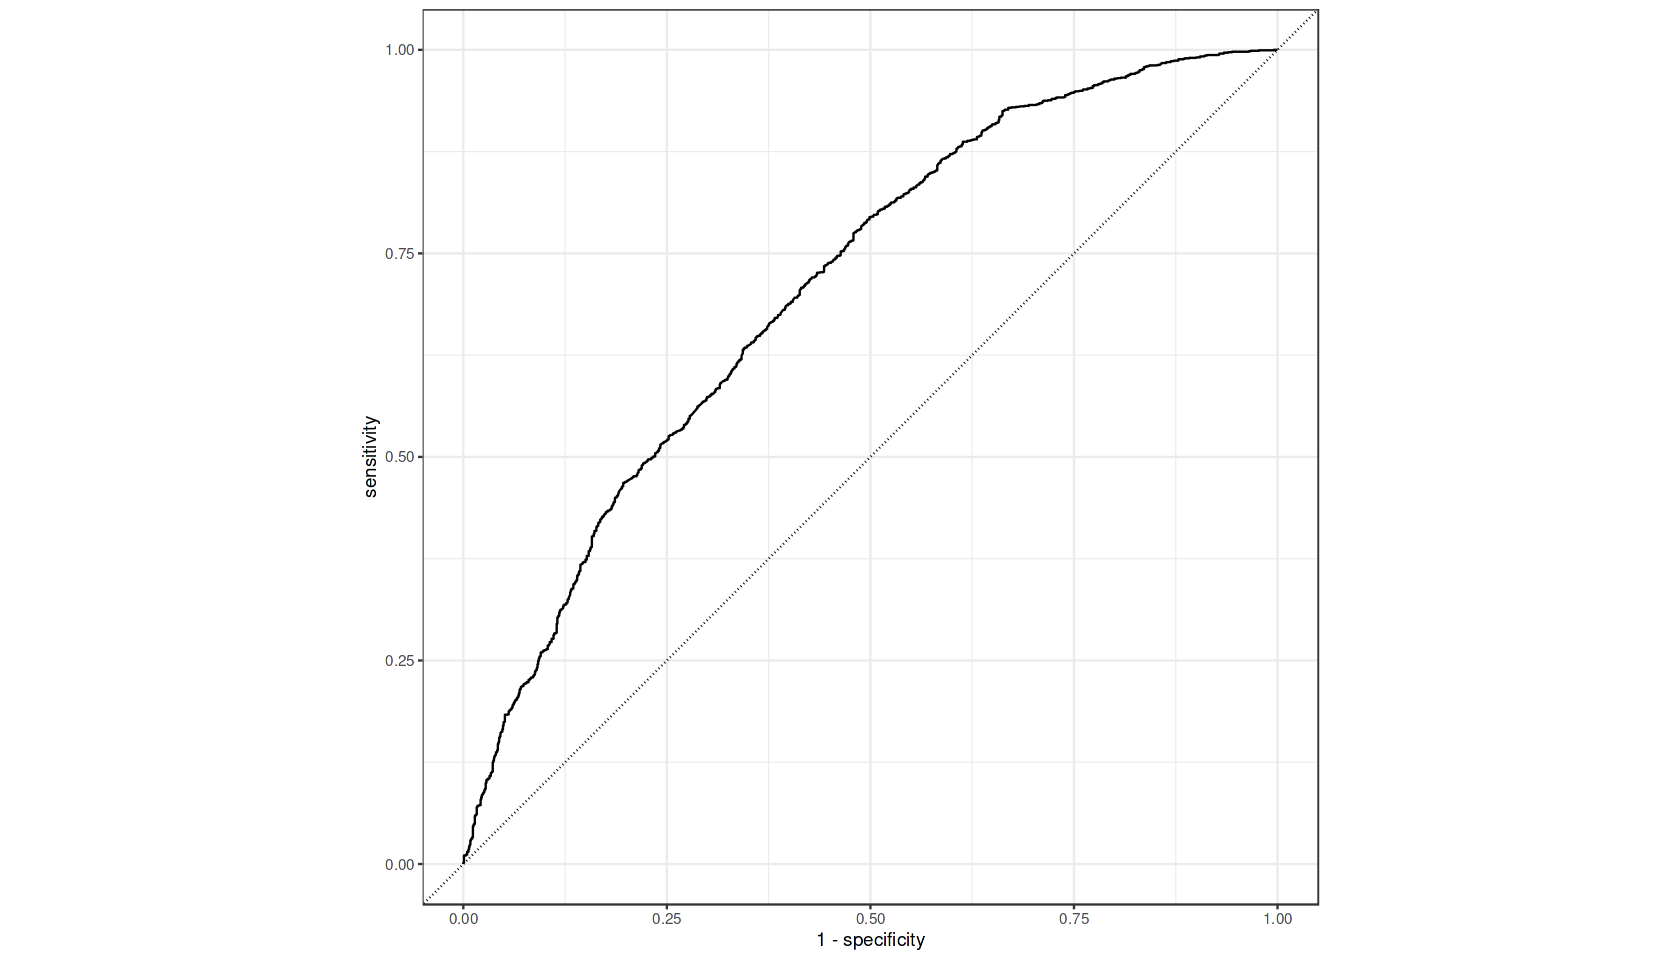

In [51]:
bt_roc <- augment(bt_final_fit, blog_test) %>% 
  dplyr::select(age_group, starts_with(".pred"))

# Compute ROC curve
roc_curve(bt_roc, truth = age_group, .pred_over) %>% 
  autoplot()


The ROC Curve plots were similar for both models, which makes sense since their AUC scores were similar as well.


# Conclusion

Throughout the process of this project, we have analyzed and fit several models with the goal of finding the best model to perform age classification on an author by using one of their blog posts. Ultimately, we came to the conclusion that the random forest model was our best performing model with the boosted trees model following closely behind in performance. This makes sense as there are many strengths in random forest models that help provide a higher level or accuracy in predicting outcomes. One beneficial feature of this type of model is its ability to automatically balance data sets where the outcome classes may not be equal. Since we had a substantially greater amount of data for our `over` group, this feature definitely helped establish equilibrium. Furthermore, the random forest model is nonparametric and has greater flexibility due to it have no assumptions about the outcome. However, the best performing model only uses one predictor variable, so perhaps we could improve this model by exploring the data deeper to look for more patterns and possible predictors.

We should also note that our worse performing model is Quadratic Determinant Analysis model. This is unsurprising since a QDA model assumes that the response classes are all separable and has normal distribution. Also, since each has has its own variance, it may be too flexible. Also, since this is a binary classification problem, it may be unnecessary to use more complex techniques like LDA and QDA, as logistic regression will often be adequate. Here, we can see that the simple logic regression model performed much better than the LDA and QDA models. If we had separated the age groups into more than 2 groups, we would have preferred to use the LDA and QDA classification techniques.

To further improve our performance, we could look towards applying other more complex methods such as a neural network, Support Vector Machines, or Naive Bayes. Also, we could add more predictor variables based on other linguistic differences between groups. For example, we could also add predictors for the topics of each post. Additionally, if I had used a dictionary of slang/abbreviations rather than self compiling a list of them, I could have a better coverage of what slang is out there rather than just the ones I know of / could find. 

Overall, I had a great experience assembling this Age Prediction project and advancing my knowledge in machine learning! I've always been interested in NLP so I thoroughly enjoyed this opportunity to explore this interest further. I look forward to looking into this topic further and continue to learn more machine learning techniques.

## Sources

- Kaggle data set used: [Blog Authorship Corpus dataset](https://www.kaggle.com/datasets/rtatman/blog-authorship-corpus)

All information can be found in the link above.